<h1>Practical implementation on the Statistics concept based on Titanic Dataset</h1>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import statistics as stat
import matplotlib.pyplot as plt
import random

<h3>0.0 Importing Titanic dataset</h3>

In [2]:
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
# converting class values to integer and type from category to int64
df['class'] = df['class'].replace('First', 1).replace('Second',2).replace('Third', 3)
df['class'] = df['class'].astype('int64')

In [5]:

# converting alone values to integer and type from bool to integer by using LABEL ENCODER
from sklearn.preprocessing import LabelEncoder
# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Apply label encoding to selected columns using apply and lambda
df.apply(lambda col: label_encoder.fit_transform(col) if col.name in ['alone'] else col)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,3,man,True,NaN,Southampton,no,0
1,1,1,female,38.0,1,0,71.2833,C,1,woman,False,C,Cherbourg,yes,0
2,1,3,female,26.0,0,0,7.9250,S,3,woman,False,NaN,Southampton,yes,1
3,1,1,female,35.0,1,0,53.1000,S,1,woman,False,C,Southampton,yes,0
4,0,3,male,35.0,0,0,8.0500,S,3,man,True,NaN,Southampton,no,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,2,man,True,NaN,Southampton,no,1
887,1,1,female,19.0,0,0,30.0000,S,1,woman,False,B,Southampton,yes,1
888,0,3,female,NaN,1,2,23.4500,S,3,woman,False,NaN,Southampton,no,0
889,1,1,male,26.0,0,0,30.0000,C,1,man,True,C,Cherbourg,yes,1


In [6]:
df['alone']=df['alone'].astype('int64')
df['alone'].dtype

dtype('int64')

In [7]:
df_numerical = df[df.dtypes[df.dtypes != "object"].index]

In [8]:
df_numerical.drop(["adult_male","deck"], axis=1, inplace=True)

C:\Users\abhis\AppData\Local\Temp\ipykernel_12472\2292370039.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numerical.drop(["adult_male","deck"], axis=1, inplace=True)


In [9]:
df_numerical.head()

,survived,pclass,age,sibsp,parch,fare,class,alone
0,0,3,22.0,1,0,7.2500,3,0
1,1,1,38.0,1,0,71.2833,1,0
2,1,3,26.0,0,0,7.9250,3,1
3,1,1,35.0,1,0,53.1000,1,0
4,0,3,35.0,0,0,8.0500,3,1


<h5>0.2 Checking dataset for NAN Values</h5>

In [10]:
df_numerical.isnull().sum()

survived      0
pclass        0
age         177
sibsp         0
parch         0
fare          0
class         0
alone         0
dtype: int64

<h5>0.3 Mean and Median of age</h5>

In [11]:
np.mean(df_numerical['age'])

29.69911764705882

In [12]:
np.median(df_numerical['age'])

nan

<h5>0.4 ploting box plot for checking outlier</h5>

<Axes: >

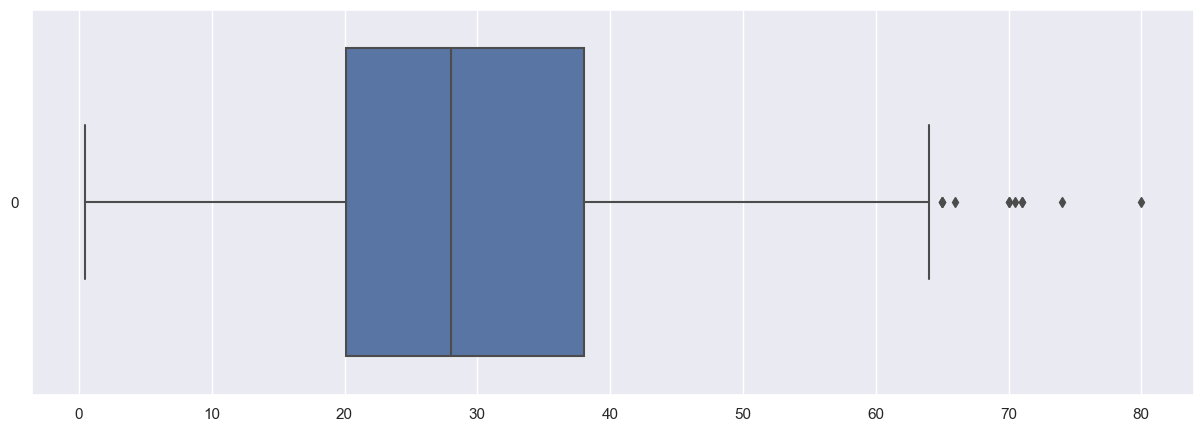

In [13]:
 sns.set(rc={'figure.figsize':(15,5)})
sns.boxplot(data=df_numerical['age'], orient="h")
#since age column contains outliers so it is better to use median for filling NAN values but the median of 
#age is NAN itself so using mean of age to fill NAN values


<h5>0.5 Filling the Nan value using the mean method </h5>

In [14]:
df_numerical["age"].fillna(np.mean(df_numerical["age"]),inplace=True)

C:\Users\abhis\AppData\Local\Temp\ipykernel_12472\4111081446.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numerical["age"].fillna(np.mean(df_numerical["age"]),inplace=True)


In [15]:
df_numerical["age"].isnull().sum()

0

<h2>1.0 Measure of central Tendency</h2>

In [16]:
np.mean(df_numerical,axis=0)

survived     0.383838
pclass       2.308642
age         29.699118
sibsp        0.523008
parch        0.381594
fare        32.204208
class        2.308642
alone        0.602694
dtype: float64

In [17]:
np.median(df_numerical,axis=0)

array([ 0.        ,  3.        , 29.69911765,  0.        ,  0.        ,
       14.4542    ,  3.        ,  1.        ])

In [18]:
df.mode()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,24.0,0,0,8.05,S,3,man,True,C,Southampton,no,1


In [19]:
#for  individual column
stat.mode(df['age'])

24.0

<h2>2.0 Measure of dispersion</h2>

<h5>2.1 variance</h5>

In [20]:
df_numerical.var()

survived       0.236772
pclass         0.699015
age          169.052400
sibsp          1.216043
parch          0.649728
fare        2469.436846
class          0.699015
alone          0.239723
dtype: float64

In [21]:
#for individual column
stat.variance(df_numerical['age'])

169.05239993721085

<h5>2.2 Standard deviation</h5>

In [22]:
df_numerical.std()

survived     0.486592
pclass       0.836071
age         13.002015
sibsp        1.102743
parch        0.806057
fare        49.693429
class        0.836071
alone        0.489615
dtype: float64

In [23]:
stat.stdev(df_numerical['age'])

13.002015226002884

<h2>3.0 Five point summary</h2>

In [24]:
percentiles=[0,25,50,75,100]
percentile_summary = pd.DataFrame(columns=['Min'] + ['25 percentile']+['Median']+['75 percentile'] + ['Max'])
for column in df_numerical.columns:
    column_data=df_numerical[column]
    column_percentiles = np.percentile(column_data, percentiles)
    #print(f"(1)Minimum value is{column}:{column_percentiles[0]}\n(2)25 percentile of {column}:{column_percentiles[1]}\n(3)Median of {column}:{column_percentiles[2]}")
    column_summary = column_percentiles.tolist()
    percentile_summary.loc[column] = column_summary
print(percentile_summary)

    

           Min  25 percentile     Median  75 percentile       Max
survived  0.00         0.0000   0.000000            1.0    1.0000
pclass    1.00         2.0000   3.000000            3.0    3.0000
age       0.42        22.0000  29.699118           35.0   80.0000
sibsp     0.00         0.0000   0.000000            1.0    8.0000
parch     0.00         0.0000   0.000000            0.0    6.0000
fare      0.00         7.9104  14.454200           31.0  512.3292
class     1.00         2.0000   3.000000            3.0    3.0000
alone     0.00         0.0000   1.000000            1.0    1.0000


<h2>4.0 Box Plot</h2>

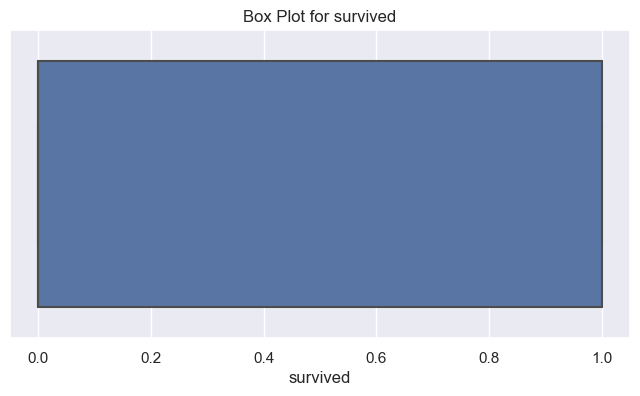

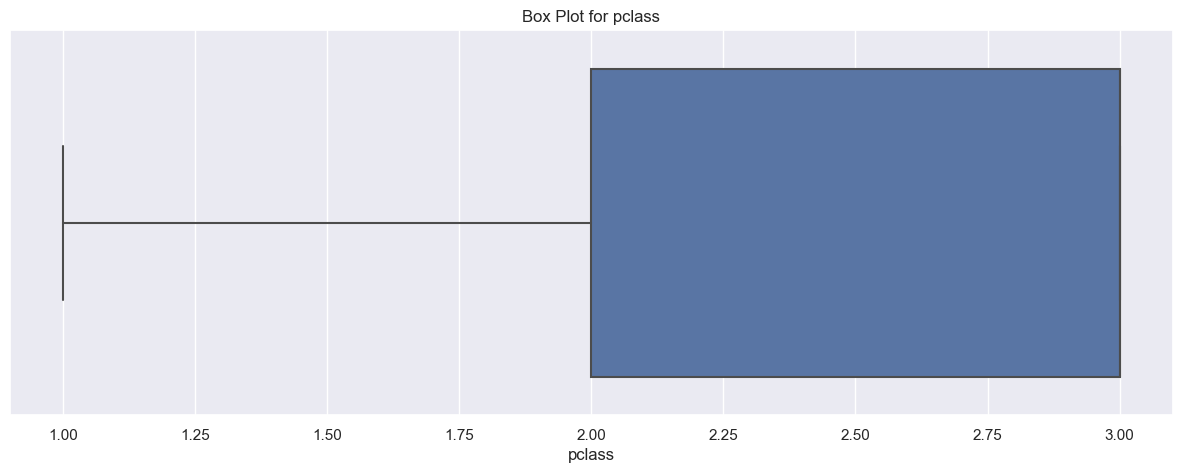

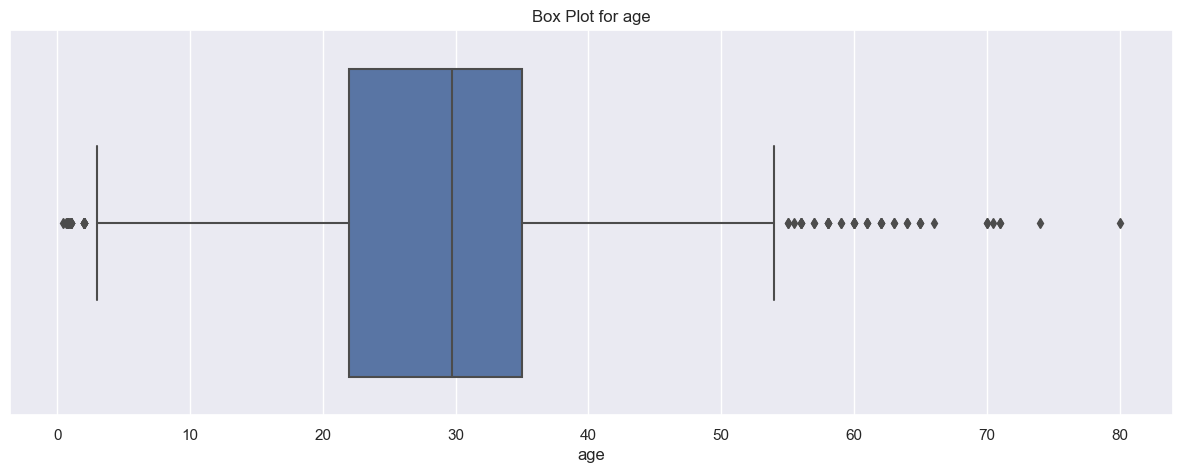

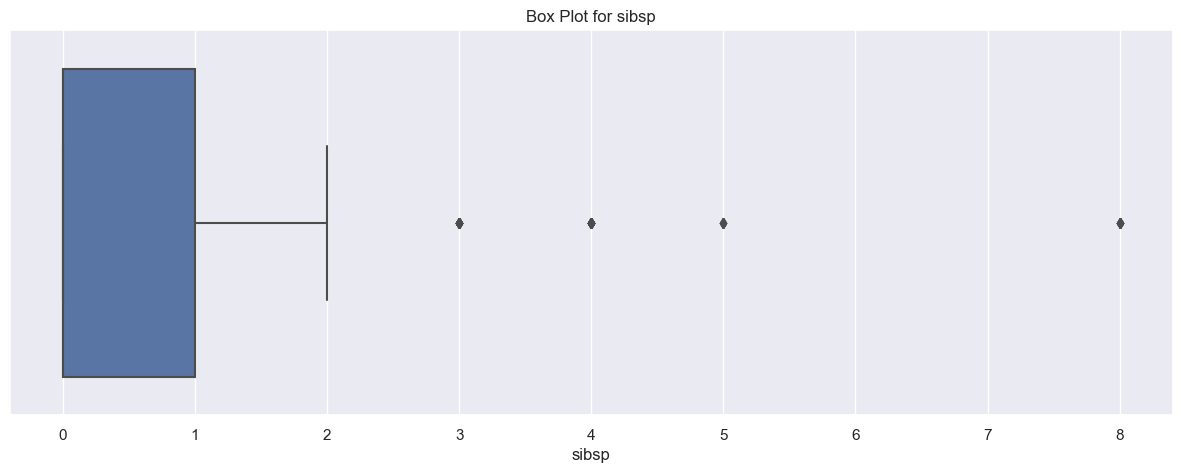

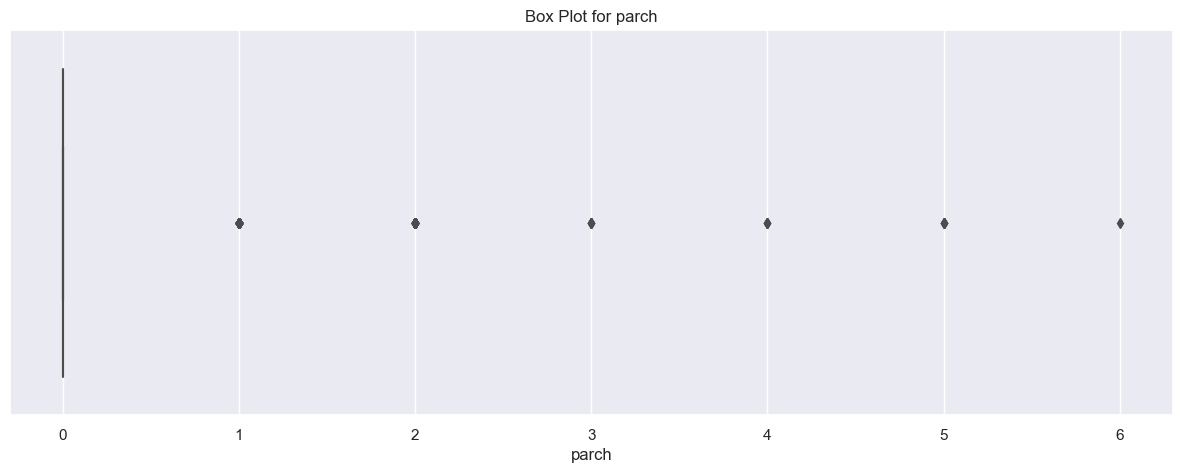

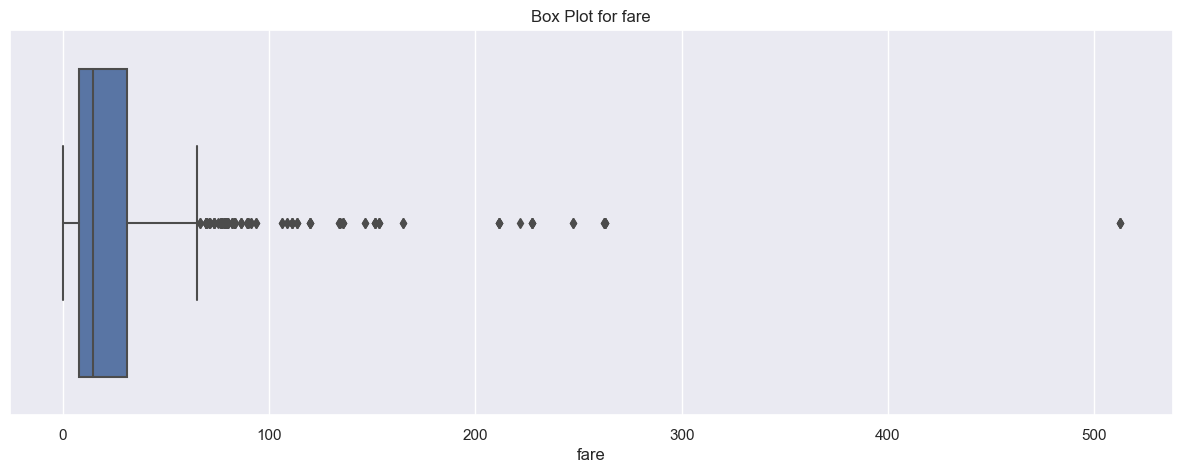

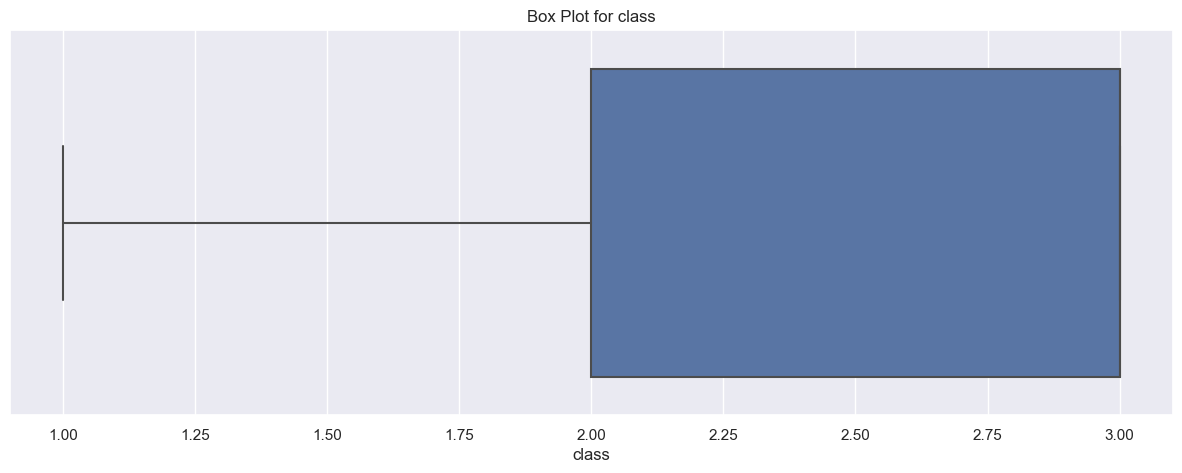

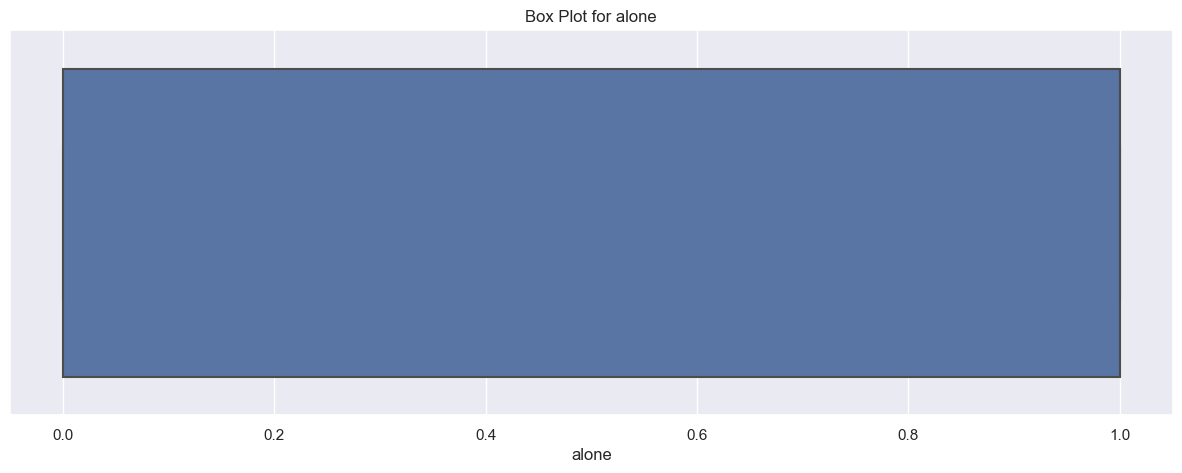

In [25]:
plt.figure(figsize=(8, 4))

# Loop through each column in the DataFrame and create a box plot
for column in df_numerical.columns:
    sns.boxplot(x=df_numerical[column])
    plt.title(f'Box Plot for {column}')
    plt.show()

<h2>5.0 Histogram and Distribution</h2>

<Axes: xlabel='survived', ylabel='Count'>

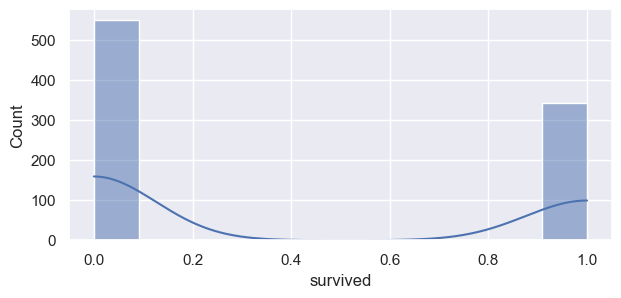

In [26]:
plt.figure(figsize=(7, 3))
sns.histplot(data=df_numerical['survived'], kde=True)

<Axes: xlabel='age', ylabel='Count'>

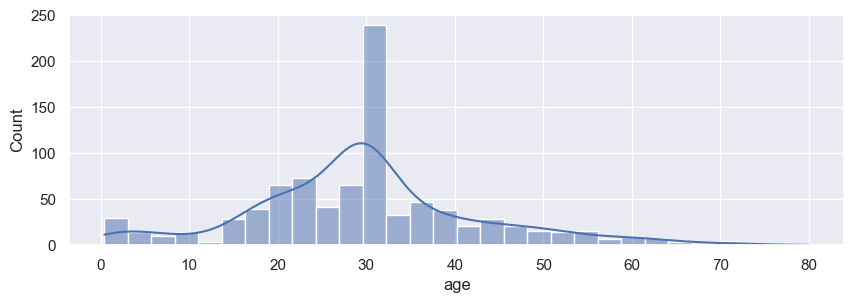

In [27]:
plt.figure(figsize=(10, 3))
sns.histplot(data=df_numerical['age'], kde=True)

<Axes: xlabel='parch', ylabel='Count'>

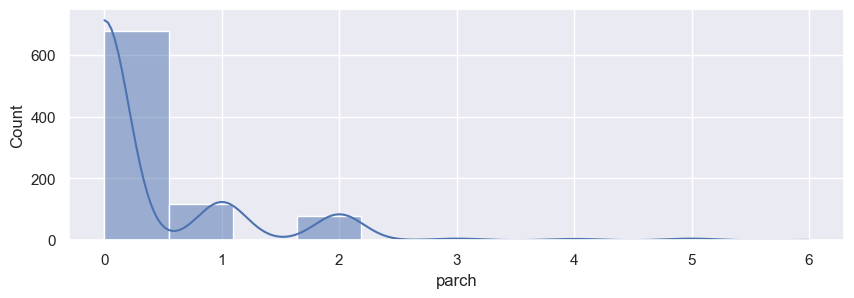

In [28]:
plt.figure(figsize=(10, 3))
sns.histplot(data=df_numerical['parch'], kde=True)

<h2>6.0 Standardization</h2>

In [29]:
df_numerical.head()

,survived,pclass,age,sibsp,parch,fare,class,alone
0,0,3,22.0,1,0,7.2500,3,0
1,1,1,38.0,1,0,71.2833,1,0
2,1,3,26.0,0,0,7.9250,3,1
3,1,1,35.0,1,0,53.1000,1,0
4,0,3,35.0,0,0,8.0500,3,1


<h4>6.1 standardization of dataset</h4>

In [30]:

df_standard = (df_numerical - df_numerical.mean())/df_numerical.std()
df_standard.head()


,survived,pclass,age,sibsp,parch,fare,class,alone
0,-0.788829,0.826913,-0.592148,0.432550,-0.473408,-0.502163,0.826913,-1.230954
1,1.266279,-1.565228,0.638430,0.432550,-0.473408,0.786404,-1.565228,-1.230954
2,1.266279,0.826913,-0.284503,-0.474279,-0.473408,-0.488580,0.826913,0.811467
3,1.266279,-1.565228,0.407697,0.432550,-0.473408,0.420494,-1.565228,-1.230954
4,-0.788829,0.826913,0.407697,-0.474279,-0.473408,-0.486064,0.826913,0.811467


<h5>6.2 mean and standard deviation of standardized dataset</h5>

In [31]:
round(df_standard.mean())

survived    0.0
pclass     -0.0
age         0.0
sibsp       0.0
parch       0.0
fare       -0.0
class      -0.0
alone      -0.0
dtype: float64

In [32]:
df_standard.std()

survived    1.0
pclass      1.0
age         1.0
sibsp       1.0
parch       1.0
fare        1.0
class       1.0
alone       1.0
dtype: float64

<h5>6.3 kde plot of original dataset</h5>

<Axes: ylabel='Density'>

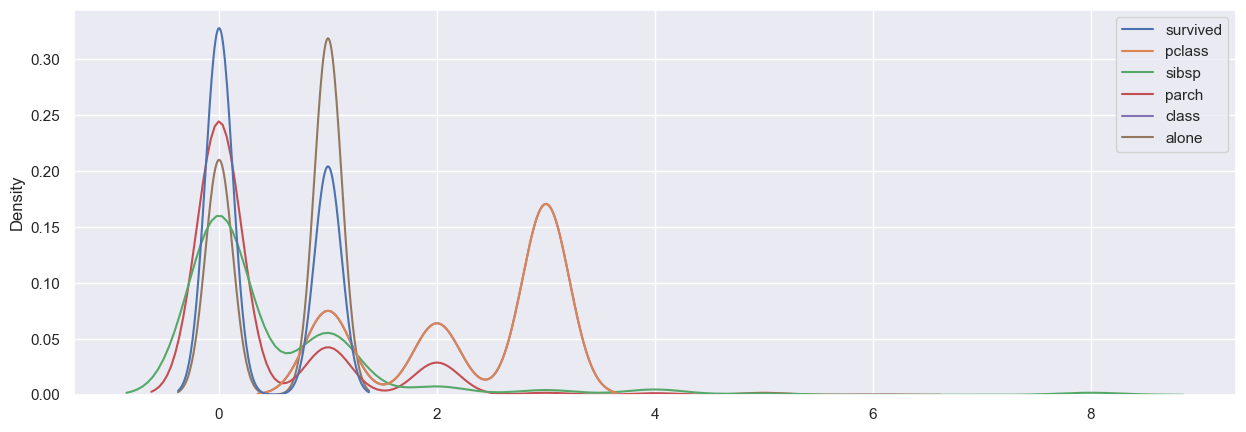

In [33]:
sns.kdeplot(data=df_numerical[['survived', 'pclass', 'sibsp', 'parch', 'class',
 'alone']])

<Axes: ylabel='Density'>

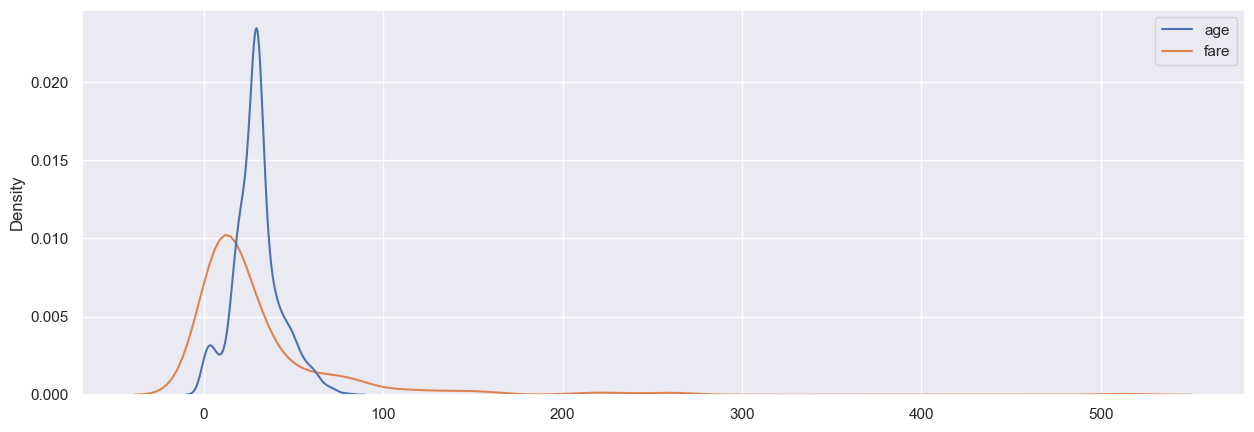

In [34]:
sns.kdeplot(data=df_numerical[['age', 'fare']])


<h5>6.4 kde plot of standardized dataset
</h5>

<Axes: ylabel='Density'>

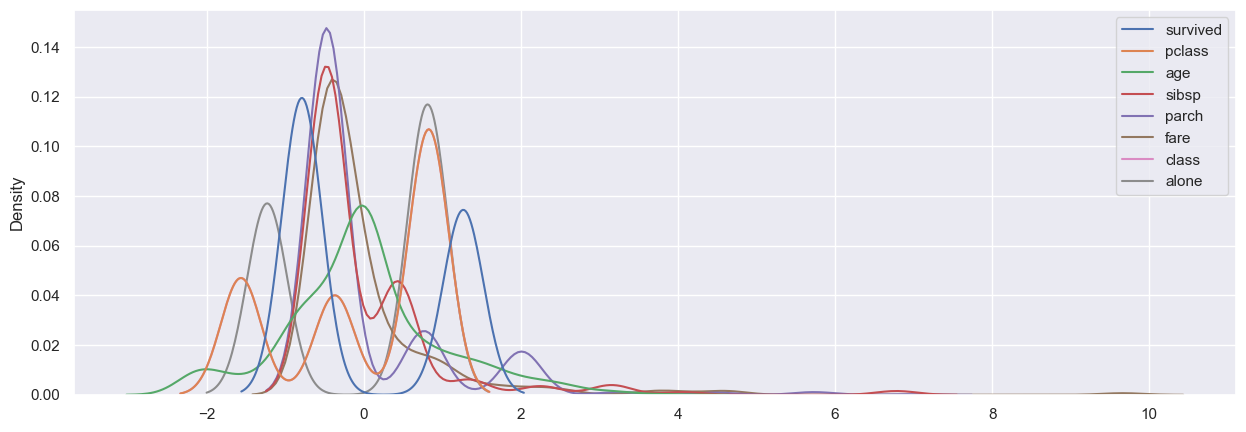

In [35]:
 sns.kdeplot(data=df_standard)

<h2>7.0 Normalization
</h2>

### 7.1 normalization of dataset

In [37]:
df_normal = (df_numerical - df_numerical.min())/(df_numerical.max() - df_numerical.min())
df_normal.head()

,survived,pclass,age,sibsp,parch,fare,class,alone
0,0.0,1.0,0.271174,0.125,0.0,0.014151,1.0,0.0
1,1.0,0.0,0.472229,0.125,0.0,0.139136,0.0,0.0
2,1.0,1.0,0.321438,0.000,0.0,0.015469,1.0,1.0
3,1.0,0.0,0.434531,0.125,0.0,0.103644,0.0,0.0
4,0.0,1.0,0.434531,0.000,0.0,0.015713,1.0,1.0


In [38]:
df_normal.min()

survived    0.0
pclass      0.0
age         0.0
sibsp       0.0
parch       0.0
fare        0.0
class       0.0
alone       0.0
dtype: float64

In [39]:
df_normal.std()

survived    0.486592
pclass      0.418036
age         0.163383
sibsp       0.137843
parch       0.134343
fare        0.096995
class       0.418036
alone       0.489615
dtype: float64

In [40]:
df_normal.mean()

survived    0.383838
pclass      0.654321
age         0.367921
sibsp       0.065376
parch       0.063599
fare        0.062858
class       0.654321
alone       0.602694
dtype: float64

<h2>7.3 kde plot of original dataset</h2>

<Axes: ylabel='Density'>

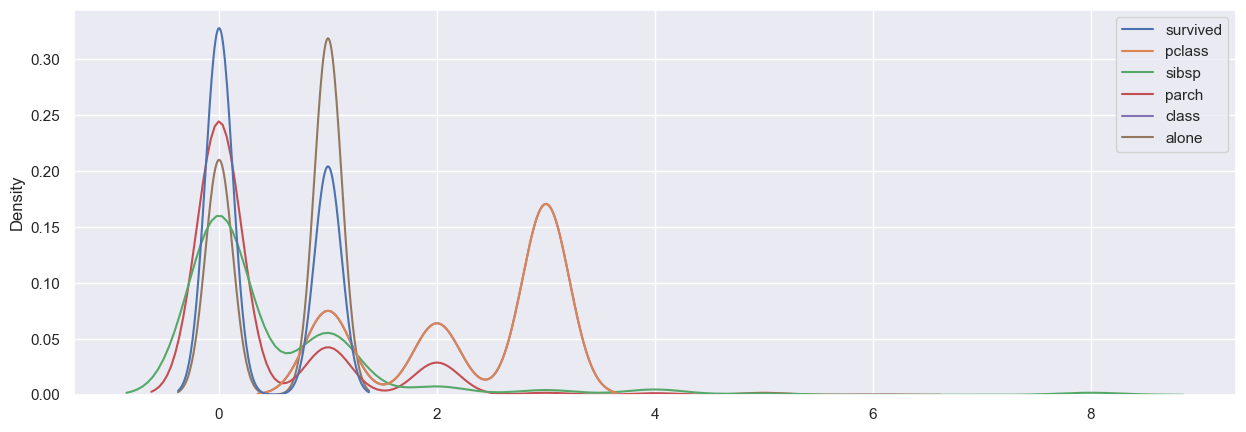

In [41]:
sns.kdeplot(data=df_numerical[['survived', 'pclass', 'sibsp', 'parch', 'class',
 'alone']])

<Axes: ylabel='Density'>

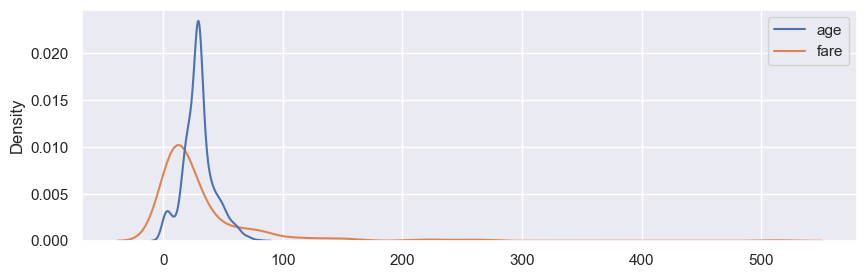

In [42]:
plt.figure(figsize=(10, 3))
sns.kdeplot(data=df_numerical[['age', 'fare']])

<h2>7.4 kde plot of normalized dataset</h2>

<Axes: ylabel='Density'>

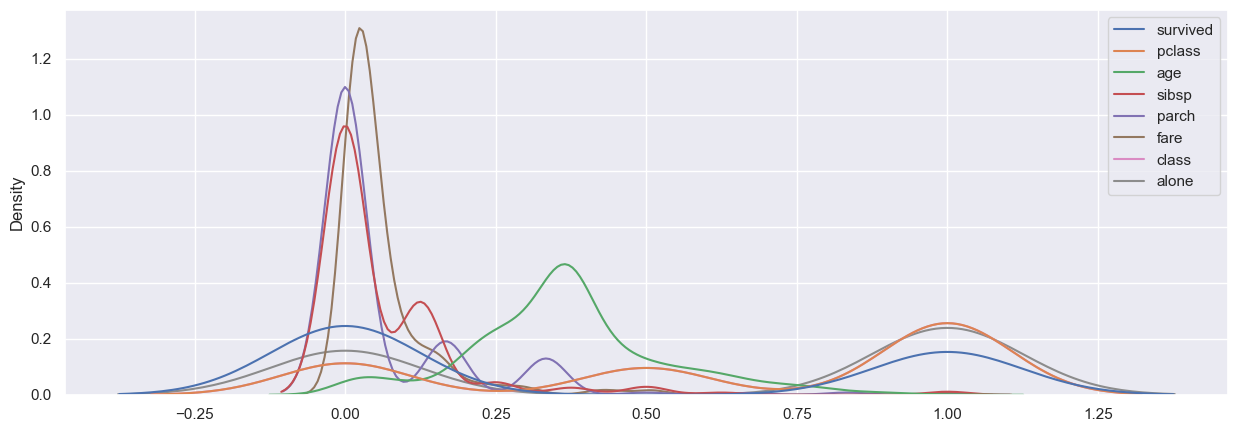

In [43]:
sns.kdeplot(data=df_normal)

<h1>8.0 Central Limit Theorem</h1>

# Central Limit Theorem (CLT) Explanation

The Central Limit Theorem (CLT) is a fundamental concept in statistics that describes the behavior of sample means when drawn from a population, particularly when the sample size is sufficiently large. The CLT has several important properties:

## Property 1: Sampling Distribution Mean
The mean (average) of the sampling distribution of sample means (μₓ¯) is equal to the population mean (μ). In other words, as you take more and more samples and calculate their means, the average of those means approaches the true population mean.

## Property 2: Sampling Distribution Standard Deviation (Standard Error)
The standard deviation (or standard error) of the sampling distribution of sample means is equal to the population standard deviation (σ) divided by the square root of the sample size (n), which can be approximated as the sample standard deviation (S) divided by the square root of the sample size. This property describes how spread out the sample means are around the population mean. As the sample size increases, the standard error decreases, indicating that larger samples provide more precise estimates of the population mean.

In practical terms, the CLT implies that even if the original data is not normally distributed, the distribution of sample means tends to follow a normal (Gaussian) distribution when the sample size is sufficiently large. This is a powerful concept in statistics and is frequently used in hypothesis testing and confidence interval calculations.

Remember that the CLT holds under certain conditions, including random sampling and when the sample size is reasonably large. It has been a cornerstone of statistical theory and has numerous applications in various fields of science a

. For n > 30, the sampling distribution becomes a normal distribution.
nd research.


## 8.1 For survived column

### 8.1.1 Population Mean and Standard Deviation

In [44]:
mean_pop_survived = df_numerical['survived'].mean()
std_pop_survived = df_numerical['survived'].std()

print(f"population mean (μ): {mean_pop_survived}\npopulation standard deviation (σ): {std_pop_survived}")

population mean (μ): 0.3838383838383838
population standard deviation (σ): 0.4865924542648585


### 8.1.2 Histplot

<Axes: xlabel='survived', ylabel='Count'>

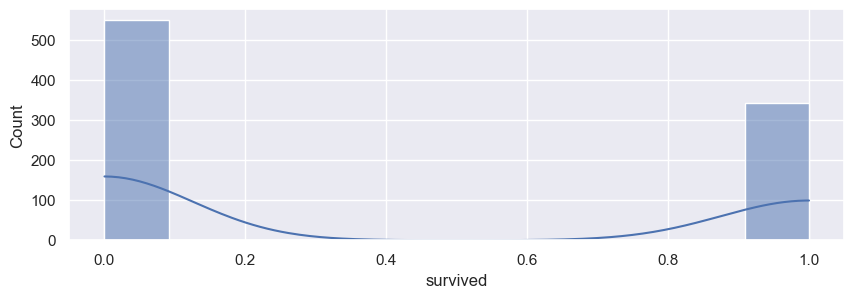

In [45]:
sns.set(rc={'figure.figsize':(10,3)})
sns.histplot(df_numerical['survived'], kde=True)

### 8.1.3 verifying CLT
### 8.1.3.1 Keeping No. of Samples Constant

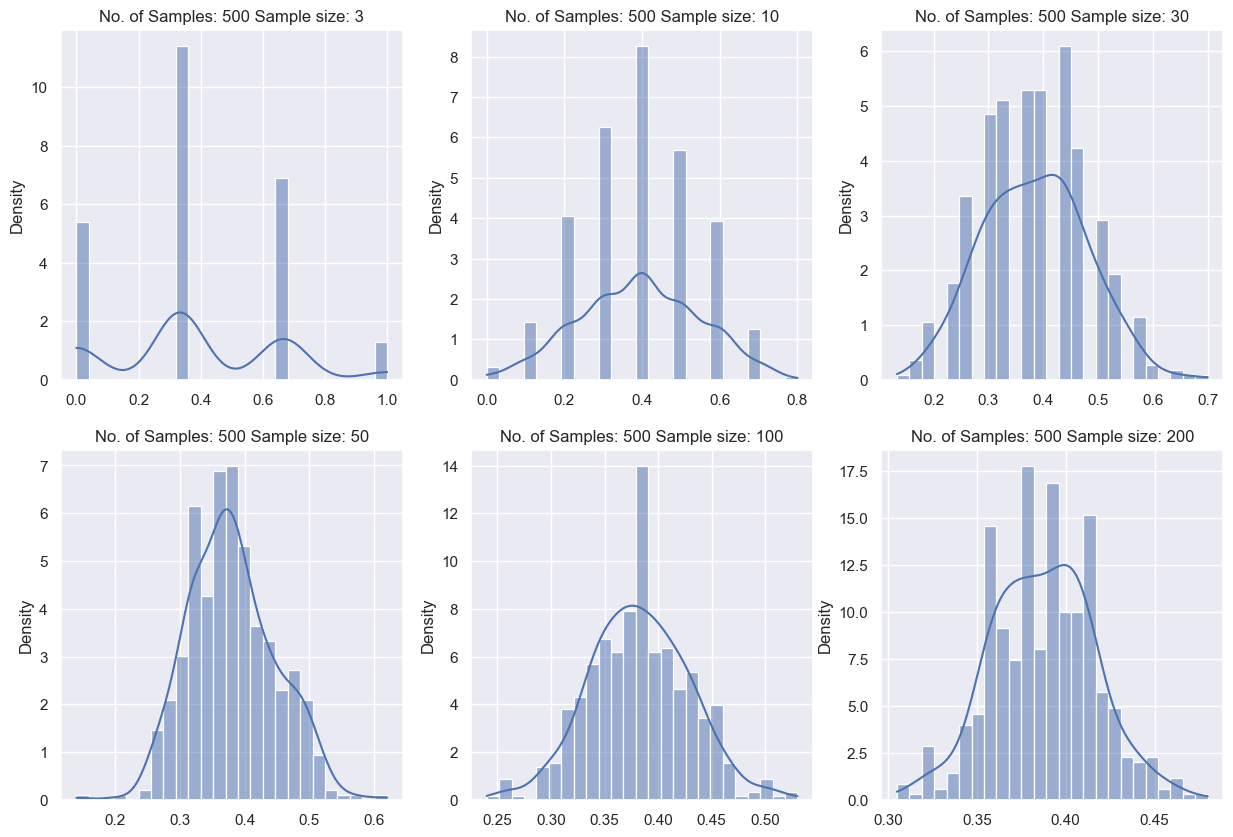

In [46]:
sample_sizes = [(500,3), (500,10), (500,30), (500,50), (500,100), (500,200)]
list_sample_means = []
# Plotting the distribution graphs for the above created Samples
plt.figure(figsize=[15,10])
for ind, (no_of_samples,samp_size) in enumerate(sample_sizes):
 sample_means = [df_numerical.survived.sample(samp_size).mean() for i in range(no_of_samples)]
 list_sample_means.append(sample_means)
 plt.subplot(2,3,ind+1)
 sns.histplot(sample_means, bins=25, kde=True, stat="density")
 plt.title("No. of Samples: "+str(no_of_samples) + " Sample size: "+str(samp_size))


In [47]:
for i in list_sample_means:
 print(pd.Series(i).mean())

0.388
0.39239999999999997
0.3843333333333333
0.3802
0.38262
0.3872


### 8.1.3.2 Keeping Samples Size Constant


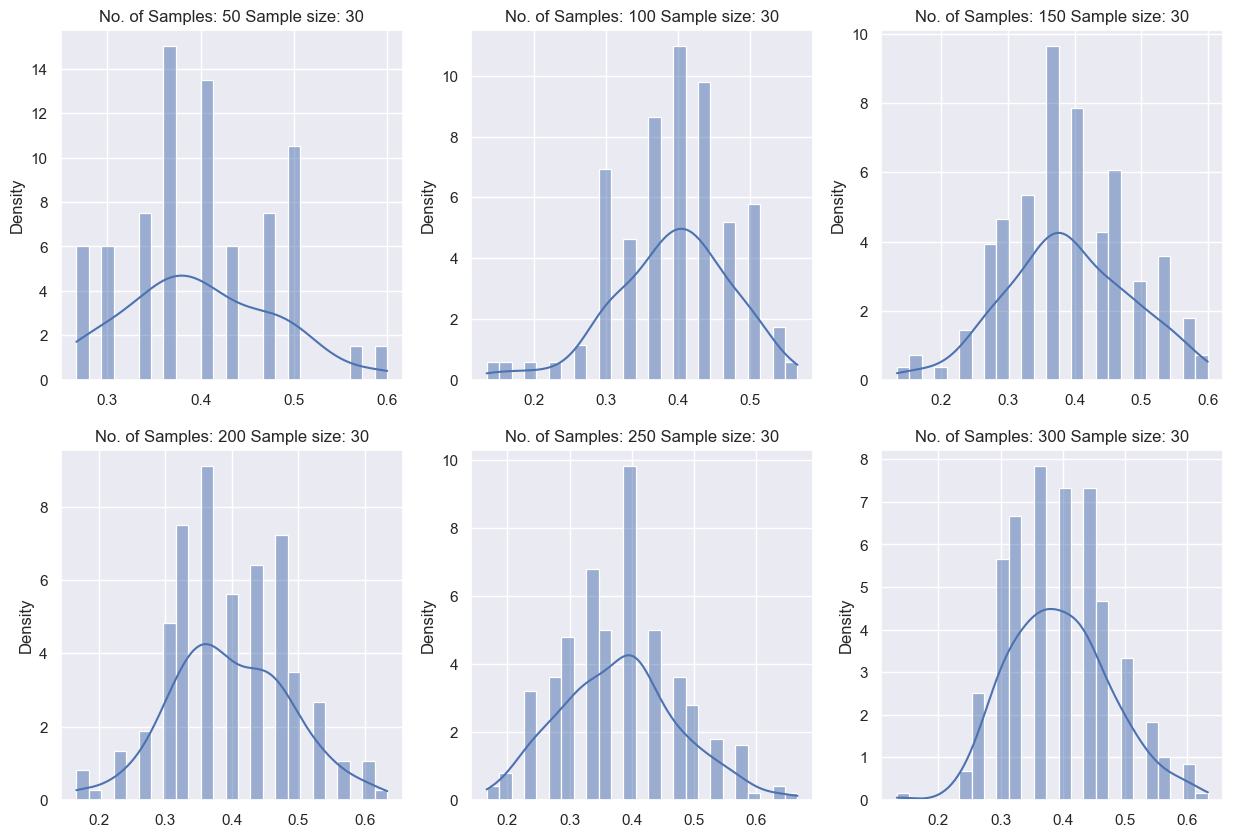

In [48]:

sample_sizes = [(50,30), (100,30), (150,30), (200,30), (250,30), (300,30)]
list_sample_means = []
# Plotting the distribution graphs for the above created Samples
plt.figure(figsize=[15,10])
for ind, (no_of_samples,samp_size) in enumerate(sample_sizes):
 sample_means = [df_numerical.survived.sample(samp_size).mean() for i in range(no_of_samples)]
 list_sample_means.append(sample_means)
 plt.subplot(2,3,ind+1)
 sns.histplot(sample_means, bins=25, kde=True, stat="density")
 plt.title("No. of Samples: "+str(no_of_samples) + " Sample size: "+str(samp_size))

In [49]:
for i in list_sample_means:
 print(pd.Series(i).mean())

0.39866666666666667
0.3936666666666666
0.39088888888888895
0.3973333333333333
0.38026666666666664
0.3948888888888889


## 8.4 For sibsp column
#### 8.4.1 Population Mean and Standard Deviation

In [50]:
mean_pop_sibsp = df_numerical['sibsp'].mean()
std_pop_sibsp = df_numerical['sibsp'].std()
print(f"population mean (μ): {mean_pop_sibsp}\npopulation standard deviation (σ): {std_pop_sibsp}")

population mean (μ): 0.5230078563411896
population standard deviation (σ): 1.1027434322934275


### 8.4.2 Hist Plot

<Axes: xlabel='sibsp', ylabel='Count'>

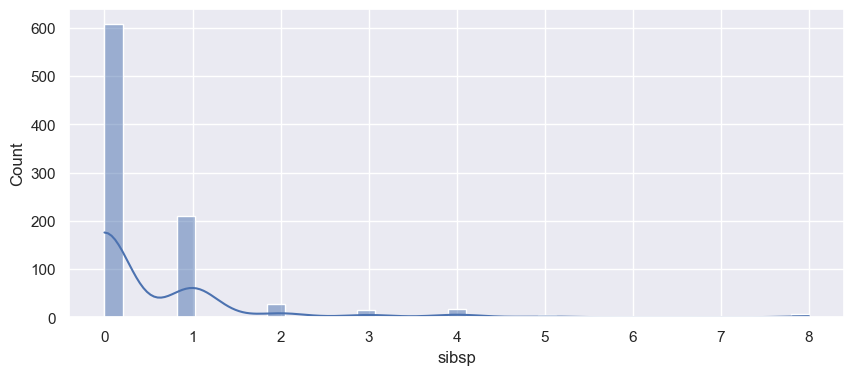

In [51]:
sns.set(rc={'figure.figsize':(10,4)})
sns.histplot(df_numerical['sibsp'], kde=True)


### 8.4.3 Verifying CLT
#### 8.4.3.1 Keeping no of sample constant

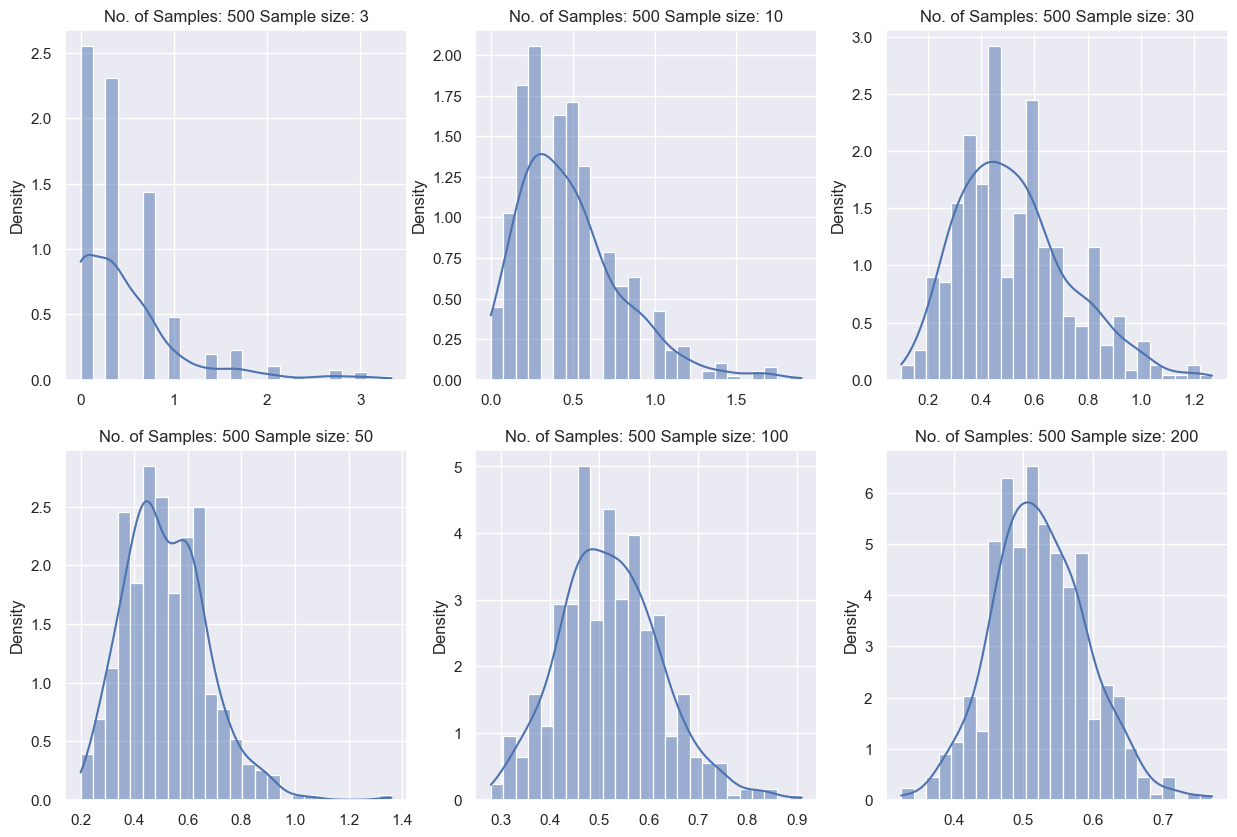

In [52]:
sample_sizes = [(500,3), (500,10), (500,30), (500,50), (500,100), (500,200)]
list_sample_means = []
# Plotting the distribution graphs for the above created Samples
plt.figure(figsize=[15,10])
for ind, (no_of_samples,samp_size) in enumerate(sample_sizes):
 sample_means = [df_numerical.sibsp.sample(samp_size).mean() for i in range(no_of_samples)]
 list_sample_means.append(sample_means)
 plt.subplot(2,3,ind+1)
 sns.histplot(sample_means, bins=25, kde=True, stat="density")
 plt.title("No. of Samples: "+str(no_of_samples) + " Sample size: "+str(samp_size))

In [53]:

for i in list_sample_means:
 print(pd.Series(i).mean())

0.48066666666666663
0.4836
0.5234666666666667
0.51764
0.52154
0.5236999999999999


#### 8.4.3.2 Keeping Samples Size Constant

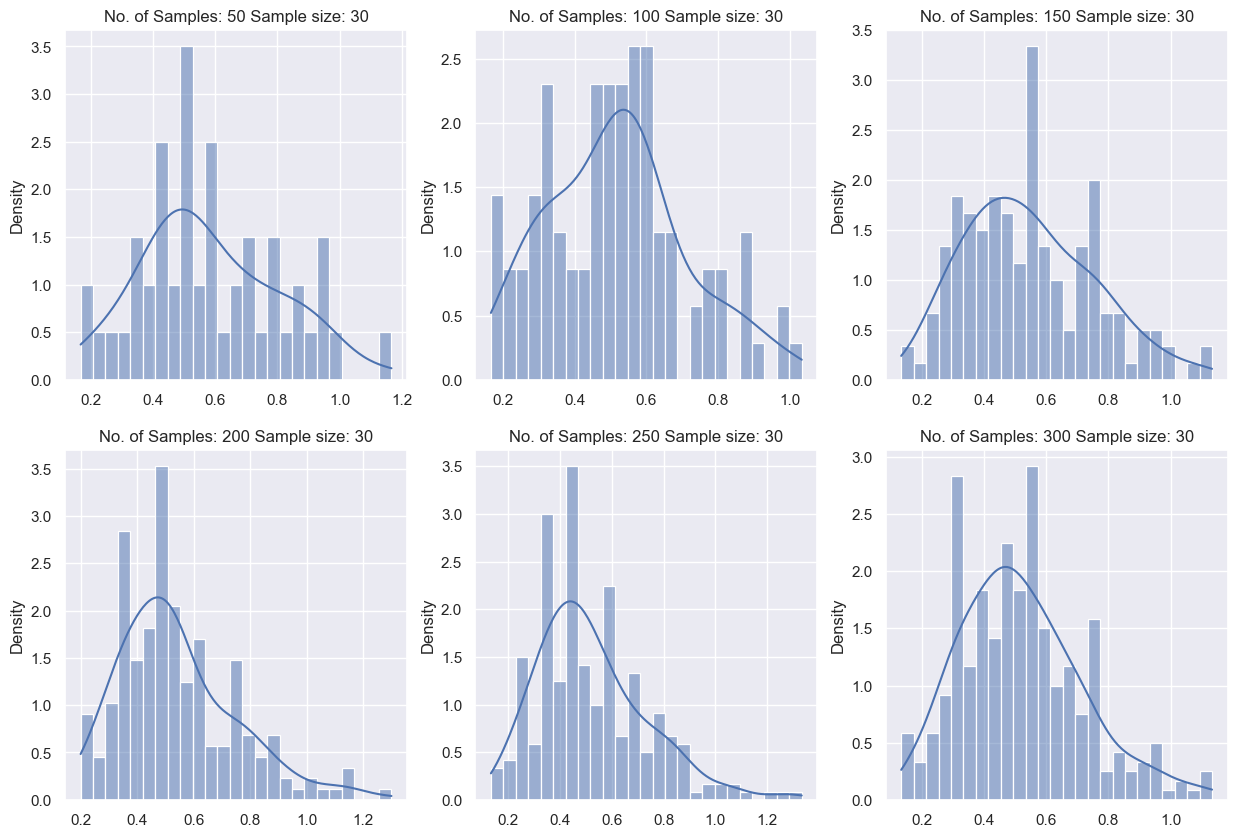

In [54]:
sample_sizes = [(50,30), (100,30), (150,30), (200,30), (250,30), (300,30)]
list_sample_means = []
# Plotting the distribution graphs for the above created Samples
plt.figure(figsize=[15,10])
for ind, (no_of_samples,samp_size) in enumerate(sample_sizes):
 sample_means = [df_numerical.sibsp.sample(samp_size).mean() for i in range(no_of_samples)]
 list_sample_means.append(sample_means)
 plt.subplot(2,3,ind+1)
 sns.histplot(sample_means, bins=25, kde=True, stat="density")
 plt.title("No. of Samples: "+str(no_of_samples) + " Sample size: "+str(samp_size))

In [55]:
for i in list_sample_means:
 print(pd.Series(i).mean())

0.5826666666666668
0.518
0.5444444444444444
0.5415
0.5212
0.5187777777777778


## 8.5 For parch column

### 8.5.1 Population Mean and Standard Deviation

In [56]:
mean_pop_parch = df_numerical['parch'].mean()
std_pop_parch = df_numerical['parch'].std()
print(f"population mean (μ): {mean_pop_parch}\npopulation standard deviation (σ): {std_pop_parch}")

population mean (μ): 0.38159371492704824
population standard deviation (σ): 0.8060572211299559


### 8.5.2 histplot


<Axes: xlabel='parch', ylabel='Count'>

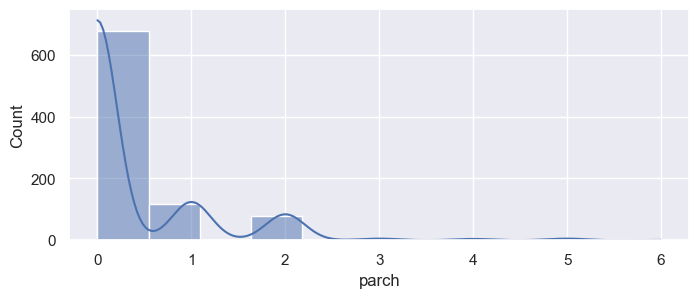

In [57]:
sns.set(rc={'figure.figsize':(8,3)})
sns.histplot(df_numerical['parch'], kde=True)

### 8.5.3 Verifying CLT
#### 8.5.3.1 Keeping no of sample constant

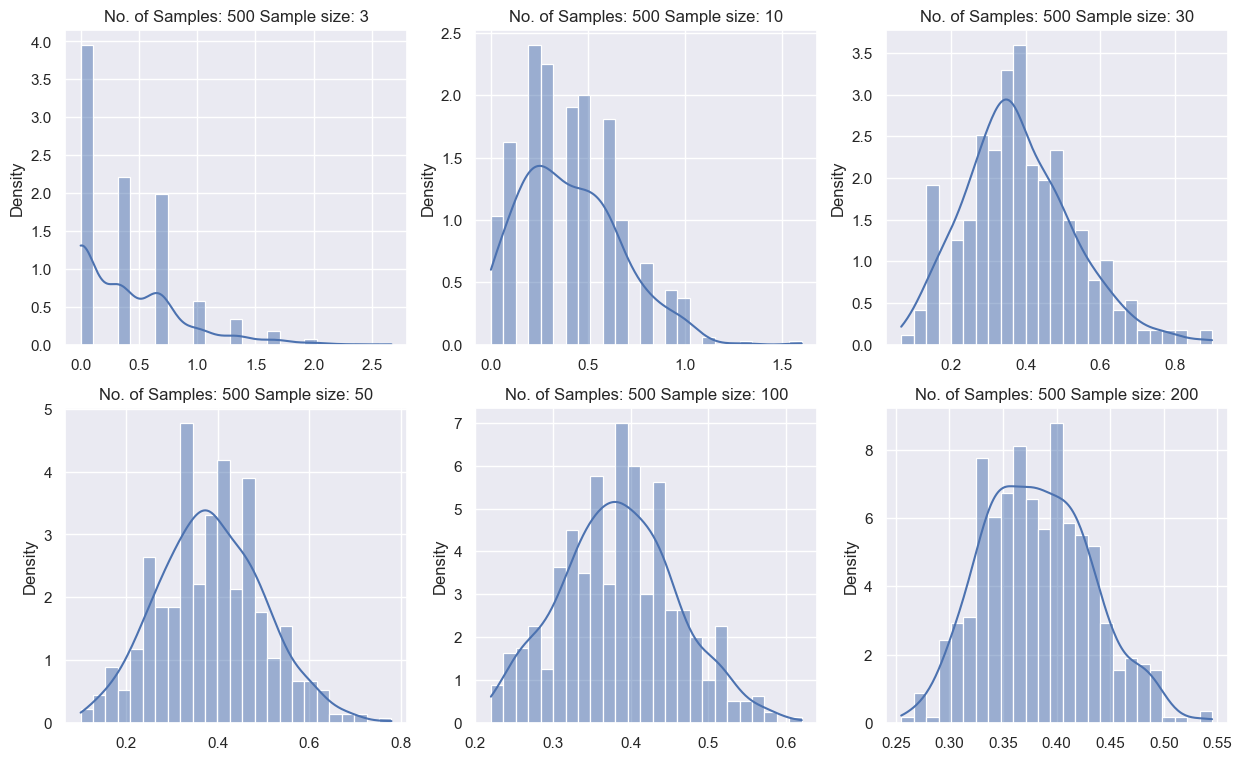

In [58]:
sample_sizes = [(500,3), (500,10), (500,30), (500,50), (500,100), (500,200)]
list_sample_means = []
# Plotting the distribution graphs for the above created Samples
plt.figure(figsize=[15,9])
for ind, (no_of_samples,samp_size) in enumerate(sample_sizes):
 sample_means = [df_numerical.parch.sample(samp_size).mean() for i in range(no_of_samples)]
 list_sample_means.append(sample_means)
 plt.subplot(2,3,ind+1)
 sns.histplot(sample_means, bins=25, kde=True, stat="density")
 plt.title("No. of Samples: "+str(no_of_samples) + " Sample size: "+str(samp_size))

### KDE plot for the remaining column

Below subplot is for the column fare where No of sample constnat


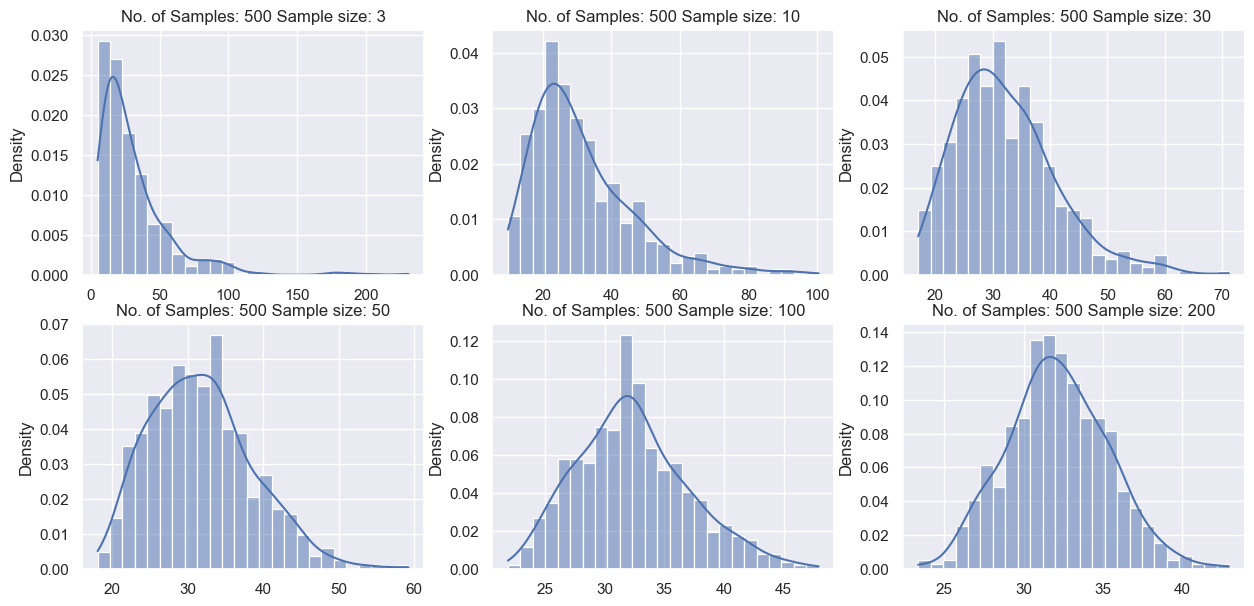

Below subplot is for the column fare where No of sample size constnat


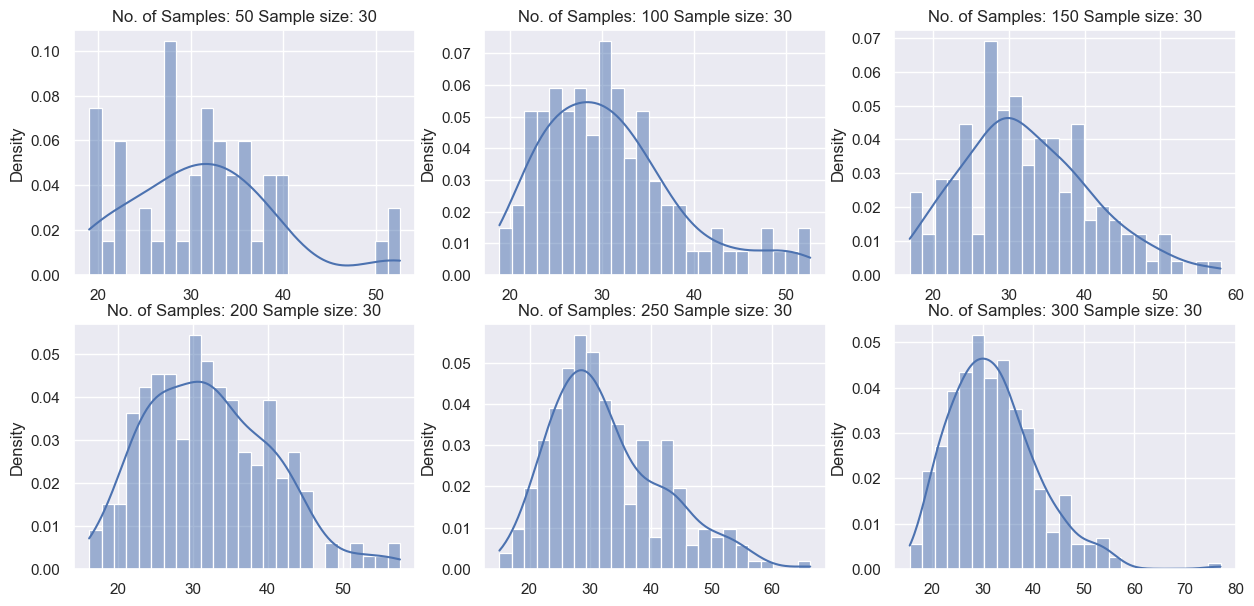

Below subplot is for the column class where No of sample constnat


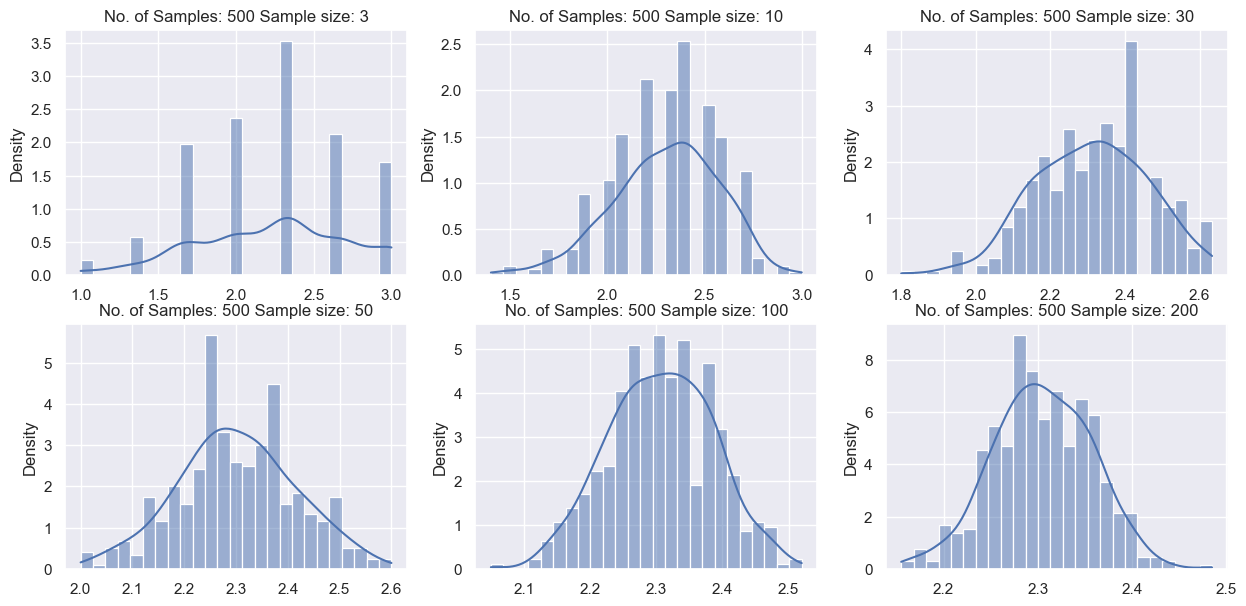

Below subplot is for the column class where No of sample size constnat


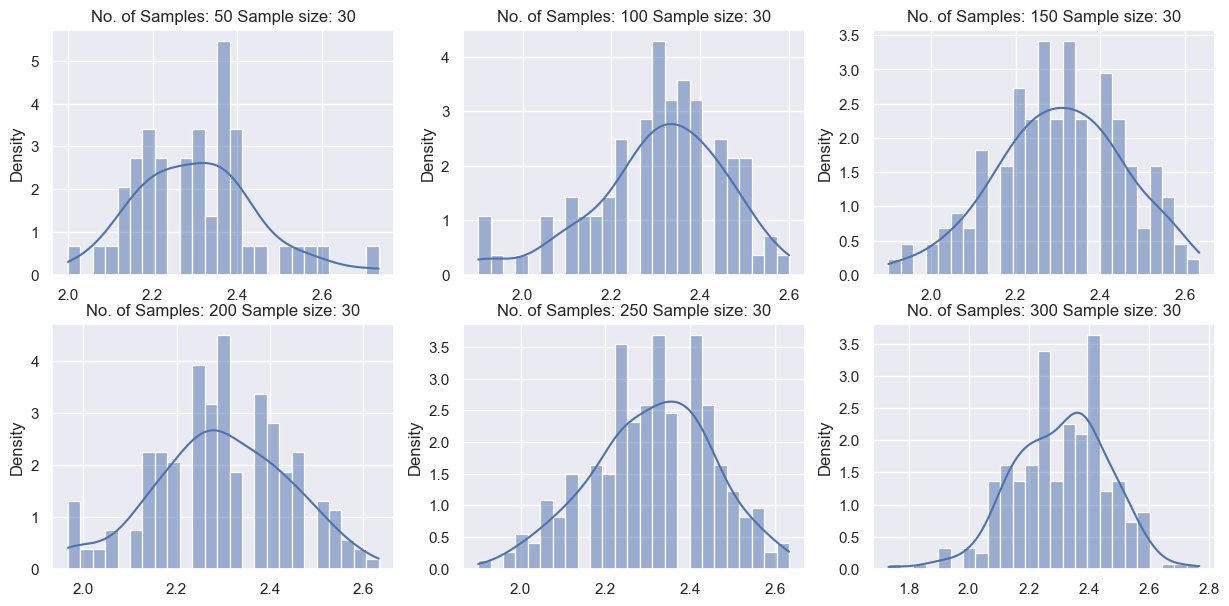

Below subplot is for the column alone where No of sample constnat


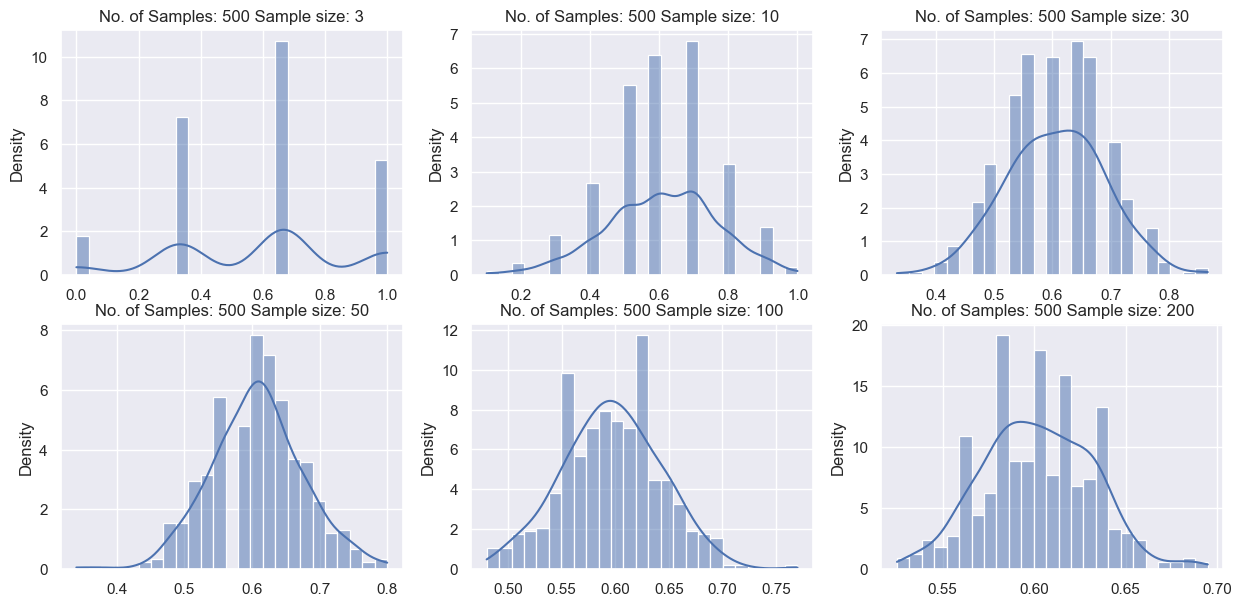

Below subplot is for the column alone where No of sample size constnat


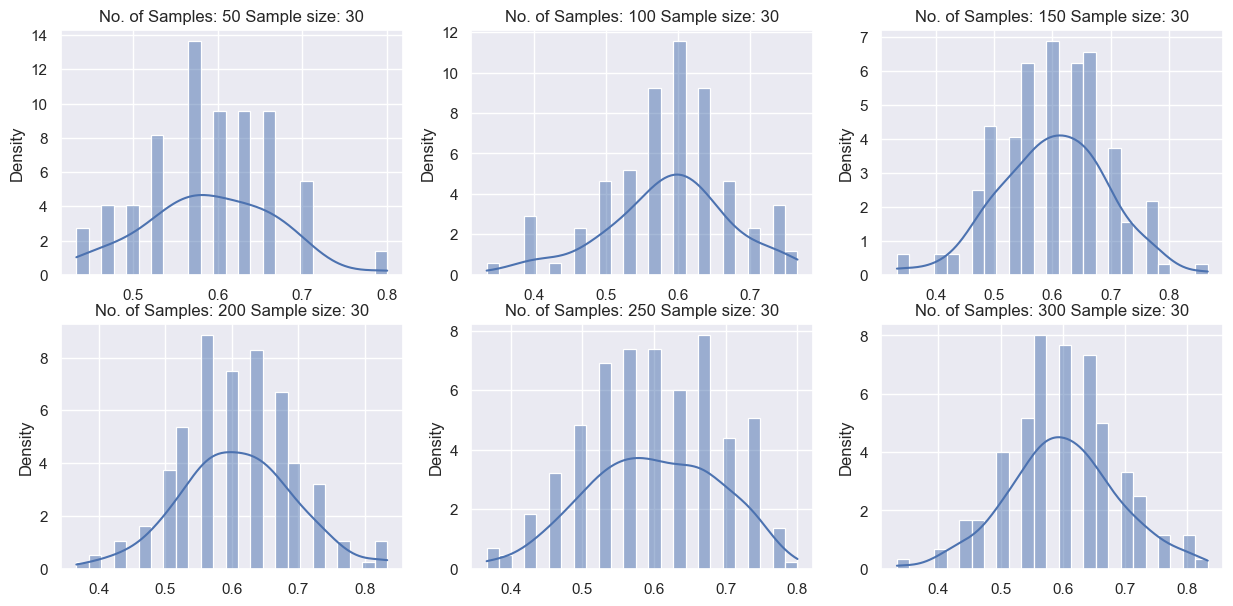

In [59]:

column = ["fare", "class", "alone"]
sample_sizes1 = [(500, 3), (500, 10), (500, 30), (500, 50), (500, 100), (500, 200)]
sample_sizes2 = [(50, 30), (100, 30), (150, 30), (200, 30), (250, 30), (300, 30)]

for clm in column:
    print(f"Below subplot is for the column {clm} where No of sample constnat")
    list_sample_means = []

    plt.figure(figsize=[15, 7])  # Move this line here
    for ind, (no_of_samples, samp_size) in enumerate(sample_sizes1):
        sample_means = [df_numerical[clm].sample(samp_size).mean() for i in range(no_of_samples)]
        list_sample_means.append(sample_means)
        plt.subplot(2, 3, ind + 1)
        sns.histplot(sample_means, bins=25, kde=True, stat="density")
        plt.title("No. of Samples: " + str(no_of_samples) + " Sample size: " + str(samp_size))
        # plt.show()  # Don't show the plot inside the loop, it will overwrite each time

    plt.show()  # Show the subplot after the loop
    list_sample_means.clear()
    plt.figure(figsize=[15, 7])
    print(f"Below subplot is for the column {clm} where No of sample size constnat")
    for ind, (no_of_samples, samp_size) in enumerate(sample_sizes2):
        sample_means = [df_numerical[clm].sample(samp_size).mean() for i in range(no_of_samples)]
        list_sample_means.append(sample_means)
        plt.subplot(2, 3, ind + 1)
        sns.histplot(sample_means, bins=25, kde=True, stat="density")
        plt.title("No. of Samples: " + str(no_of_samples) + " Sample size: " + str(samp_size))
        # plt.show()  # Don't show the plot inside the loop, it will overwrite each time

    plt.show()  # Show the subplot after the loop
    list_sample_means.clear()


# 9.0 Covariance, Pearson correlation coefficient, Spearman's rank 
correlation coefficien


### 9.1 Covariance

In [60]:
df_numerical.cov()

,survived,pclass,age,sibsp,parch,fare,class,alone
survived,0.236772,-0.137703,-0.441656,-0.018954,0.032017,6.221787,-0.137703,-0.048451
pclass,-0.137703,0.699015,-3.601855,0.076599,0.012429,-22.830196,0.699015,0.055347
age,-0.441656,-3.601855,169.052400,-3.335345,-1.877987,59.162200,-3.601855,1.144445
sibsp,-0.018954,0.076599,-3.335345,1.216043,0.368739,8.748734,0.076599,-0.315568
parch,0.032017,0.012429,-1.877987,0.368739,0.649728,8.661052,0.012429,-0.230242
fare,6.221787,-22.830196,59.162200,8.748734,8.661052,2469.436846,-22.830196,-6.613861
class,-0.137703,0.699015,-3.601855,0.076599,0.012429,-22.830196,0.699015,0.055347
alone,-0.048451,0.055347,1.144445,-0.315568,-0.230242,-6.613861,0.055347,0.239723


### 9.2 Pearson correlation coefficient

In [61]:
df_numerical.corr("pearson")

,survived,pclass,age,sibsp,parch,fare,class,alone
survived,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307,-0.338481,-0.203367
pclass,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500,1.000000,0.135207
age,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566,-0.331339,0.179775
sibsp,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651,0.083081,-0.584471
parch,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225,0.018443,-0.583398
fare,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000,-0.549500,-0.271832
class,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500,1.000000,0.135207
alone,-0.203367,0.135207,0.179775,-0.584471,-0.583398,-0.271832,0.135207,1.000000


### 9.3 Spearman's rank correlation coefficient

In [62]:
df_numerical.corr("spearman")

,survived,pclass,age,sibsp,parch,fare,class,alone
survived,1.000000,-0.339668,-0.039109,0.088879,0.138266,0.323736,-0.339668,-0.203367
pclass,-0.339668,1.000000,-0.308875,-0.043019,-0.022801,-0.688032,1.000000,0.135896
age,-0.039109,-0.308875,1.000000,-0.147035,-0.217290,0.118847,-0.308875,0.141379
sibsp,0.088879,-0.043019,-0.147035,1.000000,0.450014,0.447113,-0.043019,-0.828215
parch,0.138266,-0.022801,-0.217290,0.450014,1.000000,0.410074,-0.022801,-0.683719
fare,0.323736,-0.688032,0.118847,0.447113,0.410074,1.000000,-0.688032,-0.531472
class,-0.339668,1.000000,-0.308875,-0.043019,-0.022801,-0.688032,1.000000,0.135896
alone,-0.203367,0.135896,0.141379,-0.828215,-0.683719,-0.531472,0.135896,1.000000


### Pairplot for titanic dataset

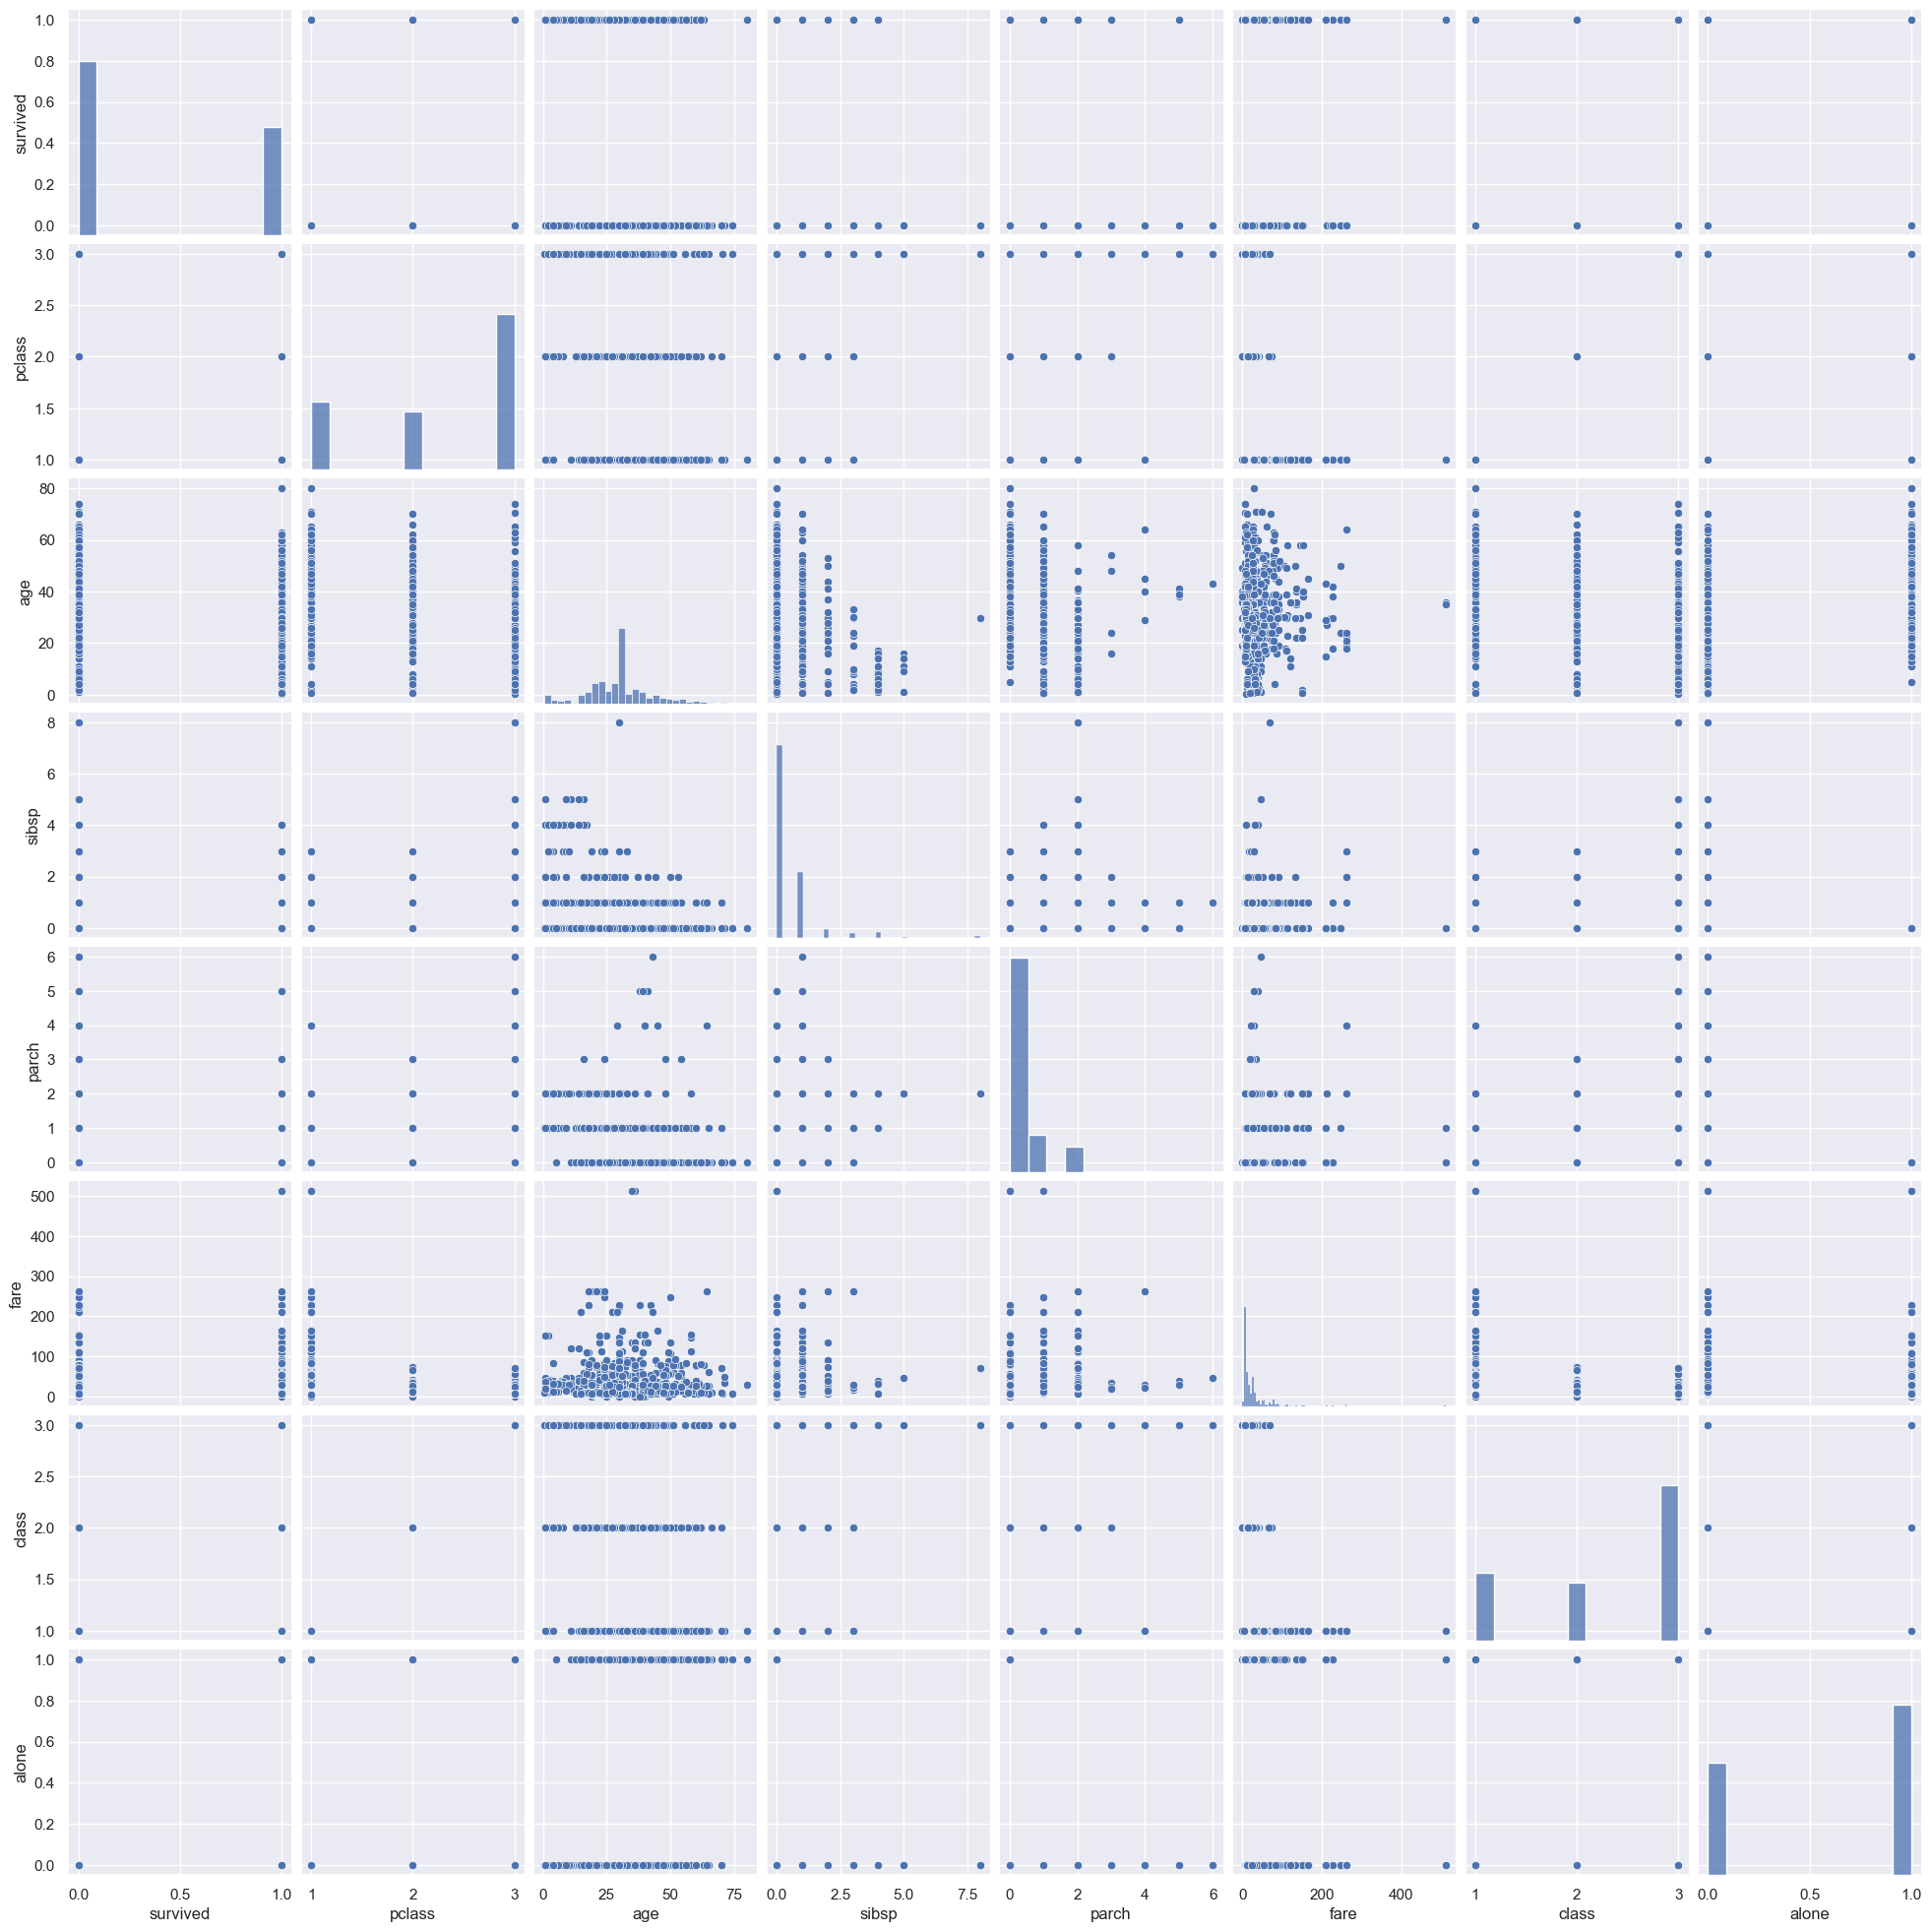

In [63]:
sns.set(rc={'figure.figsize':(25,25)})
sns.pairplot(df_numerical, height=2.5)

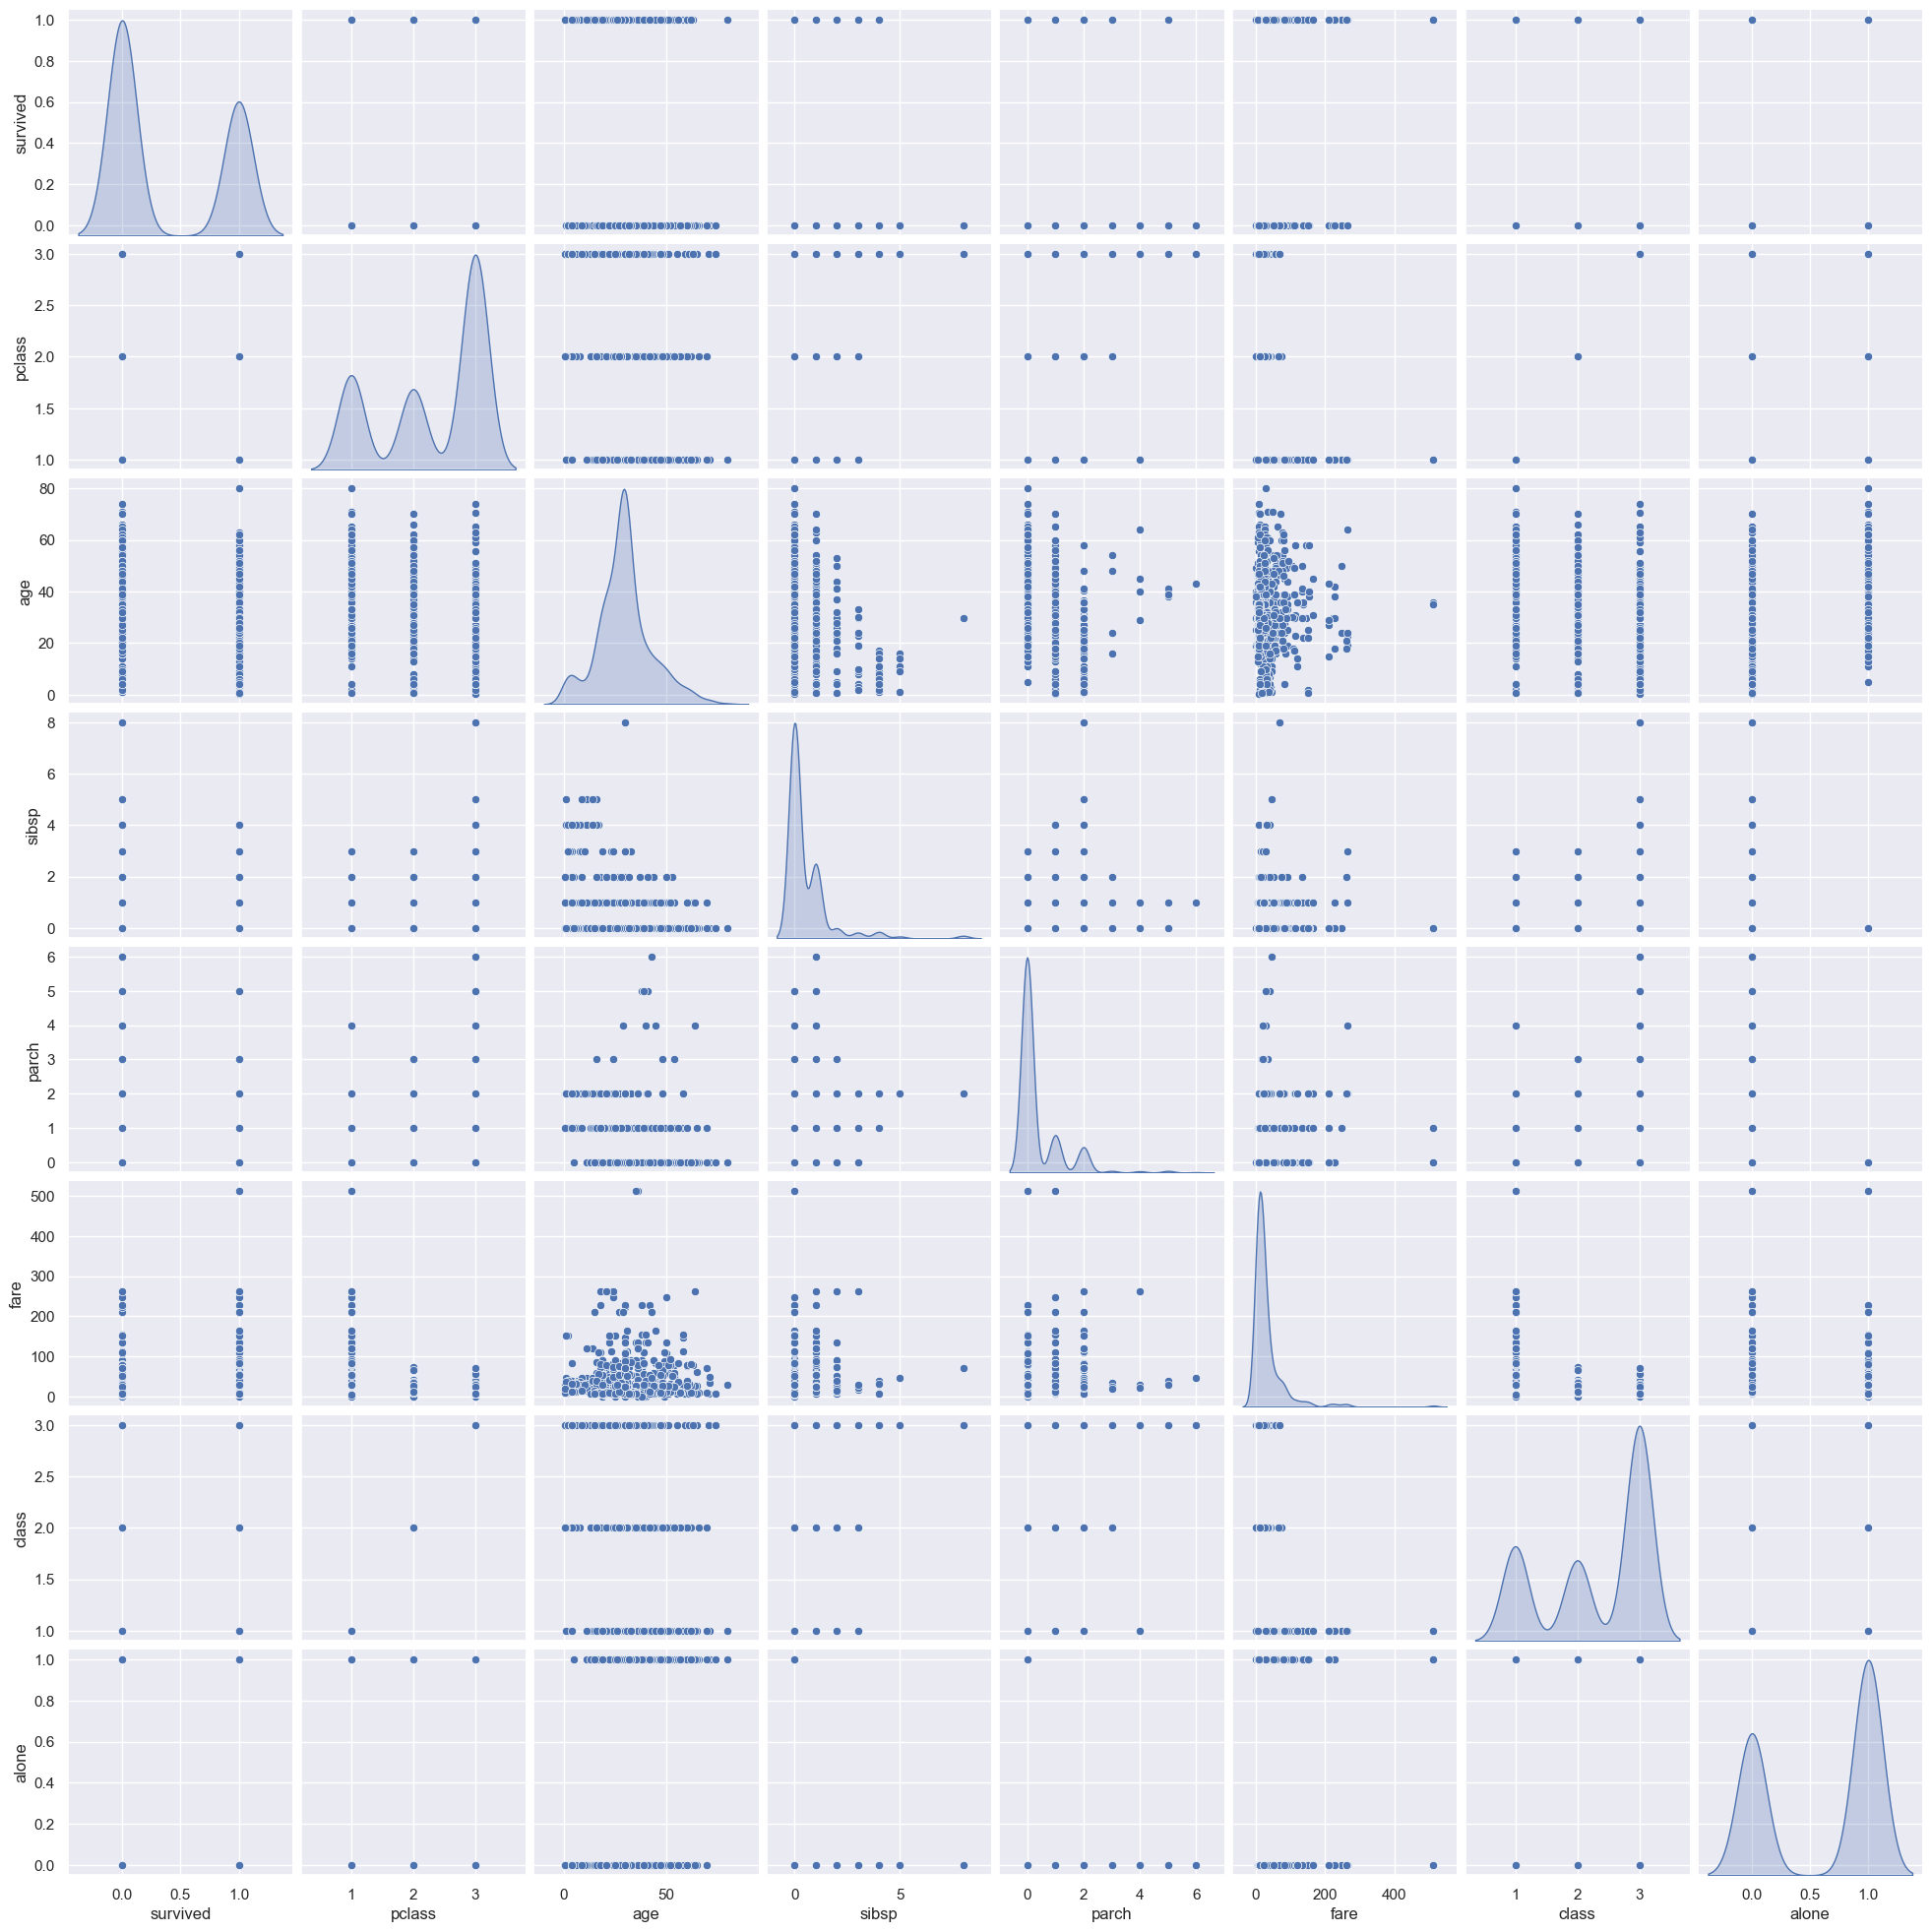

In [64]:
 sns.set(rc={'figure.figsize':(25,25)})
sns.pairplot(df_numerical, height=2.5,diag_kind="kde")

## 10.0 Hypothesis testing


### 10.1 z-Test

In [65]:
# population mean
pop_mean_fare=df_numerical['fare'].mean()
pop_mean_fare

32.204207968574636

In [66]:
 # population standard deviation 
pop_std_fare=df_numerical['fare'].std()
pop_std_fare

49.693428597180905

In [67]:
import random
import math

In [68]:
 # sampling data and calculating sample mean and standard deviation
random.seed(77)
sample_fare=pd.Series(random.sample(list(df_numerical['fare']), 80))
sample_mean_fare=sample_fare.mean()
sample_mean_fare

37.59453125

In [69]:
sample_std_fare=sample_fare.std()
sample_std_fare

66.25722719381305

## Question #1
#### 
For titanic dataset, the mean of fare is given above(32.2042079685746). A survey is conducted to check the accuracy of     
fares, randomly 80 samples were taken and its mean was found out to be 37.76125000000000
     .
1. State null and alternate hypothes     is
2. with Confidence interval of 95%, Is there is enough evidence to reject the null hypothesis.


#### step1: Stating Hypothesis
    
1. Ho = The mean of the fare is accurate.    
2. h1 = The mean of the fare is not accurat 
    The problem is related to two tailed test.
    st.

#### Step2: Decision Boundary


In [70]:
 CI = 0.95
alpha = 0.05
decision_boundary_lower_fare= -1.96 # from z table for alpha = 0.025, since two tailed test
decision_boundary_upper_fare= 1.96

### Step3: Test Statistic

In [71]:
z_statistic_fare = (sample_mean_fare-pop_mean_fare)/(pop_std_fare/math.sqrt(80))
z_statistic_fare

0.9701990478999166

In [75]:
def Hypothesis_checker(db_upper, db_lower, test_statistic):
 if test_statistic > db_lower and test_statistic < db_upper:
     return "Null Hypothesis cannot be rejected"
 else:
    return "Null Hypothesis is rejected"

### Step4: Conclusions


In [76]:
 Hypothesis_checker(decision_boundary_upper_fare,decision_boundary_lower_fare,z_statistic_fare)

'Null Hypothesis cannot be rejected'

### 10.2 t-Test9

In [77]:
 # sampling data and calculating sample mean and standard deviation
random.seed(7)
sample_fare1=pd.Series(random.sample(list(df_numerical['fare']), 25))
sample_mean_fare1=sample_fare.mean()
sample_mean_fare1

37.59453125

In [78]:
sample_std_fare1=sample_fare.std()
sample_std_fare1

66.25722719381305

## Question #2
    
For titanic dataset, the mean of fare is given above(32.2042079685746). A survey is conducted to check the accuracy of    
fares, randomly 25 samples were taken and its mean was found out to be 37.59453124999999 and standard deviation  s
66.2572271938130    5.
1. State null and alternate hypothe    sis
2. with Confidence interval of 95%, Is there is enough evidence to reject the null hypothesis.


#### . since n<30 and sample standard deviation is given, hence using t-Test. It is two tailed test.

#### Step1: Stating Hypothesis
    
1. Ho = The mean of the fare is accurate.    
2. h1 = The mean of the fare is not accurate    .
The problem is related to two tailed test.

#### Step2: Decision Boundary

In [79]:
total_sample_size_fare1 = 25
CI = 0.95
alpha = 0.05
dof_t = 24 # degree of freedom is no of samples minus one.
decision_boundary_lower_fare1= -2.064 # from t table for alpha = 0.025 (since two tailed test) and dof = 24.
decision_boundary_upper_fare1= 2.064

#### Step3: Test Statistic

In [80]:
t_statistic_fare1 = (sample_mean_fare1-pop_mean_fare)/(sample_std_fare1/math.sqrt(total_sample_size_fare1))
t_statistic_fare1

0.40677247673357986

#### Step4: Conclusions

In [81]:
 Hypothesis_checker(decision_boundary_upper_fare1,decision_boundary_lower_fare1,t_statistic_fare1)

'Null Hypothesis cannot be rejected'

### 10.3 z-Test with Proportions


In [82]:
 # counting third class passenger
count_third_class=df_numerical[df_numerical['pclass'] == 3]['pclass'].count()
count_third_class

491

In [83]:
# counting total passenger
population_count = df_numerical['pclass'].count()
population_count

891

In [84]:
 # calculating percentage of third class passenger
percent_third_class= count_third_class/population_count
percent_third_class

0.5510662177328844

In [85]:
 # sampling data and calculating sample mean and standard deviation
random.seed(89)
sample_pclass=pd.Series(random.sample(list(df['pclass']), 300))
count_third_sample= 0

In [87]:
for i in sample_pclass:
 if i == 3:
     count_third_sample += 1
count_third_sample 

154

<h1>Note: All null hypothesis will be accepted since the samples are collected from the same dataset(No Survey)</h1>